In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# Basketball Per Game Stats
**The pergamestats.csv file from https://www.basketball-reference.com/leagues/NBA_2015.html#all_all-nba is a classic dataset contains ..... The goal of this dataset is to predict ...... using these variables.**

**G** - Games Played in a Season (82)

**MP** - Minutes played per game

**FG** - Field goals (shots) made per game

**FGA** - Field goals attempted per game

**FG%** - Percentage of field goals made

**3P** - Three point shots made per game

**3PA** - Three pointers attempted per game

**3P%** - Percentage of three pointers made

**2P** - Two point shots made per game

**2PA** - Two pointers attempted per game

**2P%** - Percentage of two point shots made

**FT** - Free throws made per game (shot when you get fouled)

**FTA** - Free throws attempted per game

**FT%** - Percentage of free throws made

**ORB** - Offensive Rebounds per game

**DRB** - Defensive Rebounds per game

**TRB** - Total Rebounds per game

**AST** - Assist (passes leading to a shot)

**STL** - Steals

**BLK** - Blocks

**TOV** - turnovers

**PF** - Total Player fouls

**PTS** - Points scored

**Opp** - When we see Opp it refers to the opponents version of that stat, so we can see what other teams stats are on average when playing the team being looked at.

## Offensive Stats

In [ ]:
from io import StringIO

data = """
Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Golden State Warriors*,82,240.6,41.6,87.0,.478,10.8,27.0,.398,30.8,60.0,.514,16.0,20.8,.768,10.4,34.3,44.7,27.4,9.3,6.0,14.5,19.9,110.0
2,Los Angeles Clippers*,82,240.6,39.4,83.3,.473,10.1,26.9,.376,29.3,56.4,.519,17.9,25.2,.710,9.6,33.1,42.6,24.8,7.8,5.0,12.3,21.3,106.7
3,Dallas Mavericks*,82,242.4,39.7,85.8,.463,8.9,25.4,.352,30.8,60.4,.509,16.9,22.5,.752,10.5,31.8,42.3,22.5,8.1,4.5,13.0,20.0,105.2
4,Oklahoma City Thunder,82,241.8,38.8,86.8,.447,7.7,22.7,.339,31.1,64.1,.486,18.6,24.6,.754,12.8,34.7,47.5,20.5,7.3,5.5,14.7,22.3,104.0
5,Toronto Raptors*,82,242.1,37.9,83.3,.455,8.9,25.1,.352,29.0,58.2,.499,19.3,24.6,.787,10.7,30.8,41.5,20.7,7.5,4.4,12.9,20.9,104.0
6,Houston Rockets*,82,241.5,37.0,83.3,.444,11.4,32.7,.348,25.6,50.6,.506,18.6,26.0,.715,11.7,32.0,43.7,22.2,9.5,5.0,16.7,22.0,103.9
7,San Antonio Spurs*,82,243.4,39.1,83.6,.468,8.3,22.5,.367,30.9,61.1,.505,16.7,21.4,.780,9.8,33.8,43.6,24.4,8.0,5.4,14.0,19.1,103.2
8,Cleveland Cavaliers*,82,241.2,37.7,82.2,.458,10.1,27.5,.367,27.6,54.7,.504,17.7,23.6,.751,11.1,31.9,43.0,22.1,7.4,4.1,14.3,18.4,103.1
9,Portland Trail Blazers*,82,242.1,38.7,86.0,.450,9.8,27.2,.362,28.9,58.8,.491,15.5,19.4,.801,10.7,35.1,45.9,21.9,6.4,4.5,13.6,18.2,102.8
10,Atlanta Hawks*,82,240.6,38.1,81.7,.466,10.0,26.2,.380,28.1,55.5,.506,16.5,21.2,.778,8.7,31.8,40.6,25.7,9.1,4.6,14.2,17.8,102.5
11,Phoenix Suns,82,242.4,38.8,85.8,.452,8.5,25.0,.341,30.2,60.9,.497,16.4,21.5,.760,10.9,32.2,43.2,20.2,8.5,4.7,15.1,21.3,102.4
12,Denver Nuggets,82,242.4,37.8,87.3,.433,8.0,24.8,.325,29.7,62.5,.476,17.8,24.3,.734,12.3,32.4,44.7,21.8,7.8,4.5,14.2,23.0,101.5
13,Boston Celtics*,82,242.4,38.9,87.9,.443,8.0,24.6,.327,30.9,63.3,.488,15.4,20.5,.754,11.1,32.7,43.8,24.5,8.2,3.6,13.8,21.2,101.4
14,Sacramento Kings,82,242.1,36.7,80.7,.455,5.6,16.5,.341,31.1,64.2,.484,22.3,29.3,.762,10.9,33.3,44.2,20.3,6.7,4.0,16.3,20.7,101.3
15,Chicago Bulls*,82,242.4,36.6,82.9,.442,7.9,22.3,.353,28.7,60.6,.474,19.7,25.2,.783,11.7,34.0,45.7,21.7,6.3,5.8,14.0,18.2,100.8
16,New Orleans Pelicans*,82,241.2,37.9,82.9,.457,7.1,19.3,.370,30.8,63.6,.484,16.4,21.8,.751,11.5,32.0,43.5,22.0,6.7,6.2,13.3,18.7,99.4
17,Washington Wizards*,82,243.4,38.3,82.8,.462,6.1,16.8,.360,32.2,66.0,.488,15.9,21.4,.742,10.5,34.2,44.7,24.0,7.3,4.6,15.0,20.8,98.5
18,Los Angeles Lakers,82,243.0,37.2,85.6,.435,6.5,18.9,.344,30.8,66.8,.461,17.5,23.6,.741,11.6,32.3,43.9,20.9,7.0,4.5,13.2,21.2,98.5
19,Detroit Pistons,82,241.8,37.1,85.8,.432,8.6,24.9,.344,28.5,60.9,.468,15.8,22.4,.703,12.8,32.1,44.9,21.6,7.6,4.7,13.4,19.0,98.5
20,Memphis Grizzlies*,82,242.7,37.8,82.5,.458,5.2,15.2,.339,32.6,67.3,.485,17.6,22.8,.773,10.4,32.1,42.6,21.7,8.5,4.2,13.3,19.1,98.3
21,Brooklyn Nets*,82,243.0,37.4,83.0,.451,6.6,19.9,.331,30.8,63.1,.489,16.6,22.2,.748,10.3,32.0,42.4,20.9,7.0,4.1,13.8,19.3,98.0
22,Minnesota Timberwolves,82,241.5,36.4,83.2,.438,5.0,14.9,.332,31.5,68.3,.461,20.0,25.7,.776,11.6,29.3,40.9,21.6,8.1,4.0,15.0,19.2,97.8
23,Milwaukee Bucks*,82,243.0,37.6,82.0,.459,6.6,18.3,.363,31.0,63.7,.486,16.0,21.1,.757,10.7,31.4,42.1,23.6,9.6,4.9,16.7,22.1,97.8
24,Indiana Pacers,82,242.1,36.6,83.2,.439,7.5,21.2,.352,29.1,62.0,.469,16.7,22.2,.756,10.4,34.4,44.9,21.4,6.2,4.6,14.0,21.2,97.3
25,Orlando Magic,82,240.9,37.5,82.8,.453,6.8,19.5,.347,30.8,63.3,.486,13.9,19.1,.729,10.0,31.8,41.8,20.6,7.9,3.8,14.9,20.9,95.7
26,Utah Jazz,82,240.3,35.4,79.2,.447,7.4,21.7,.343,27.9,57.5,.486,17.0,23.5,.721,12.0,31.9,44.0,19.9,7.6,6.0,15.3,19.3,95.1
27,Miami Heat,82,240.6,35.2,77.2,.456,6.8,20.2,.335,28.4,57.0,.499,17.5,23.7,.741,9.1,30.0,39.1,19.8,7.8,4.5,14.8,20.0,94.7
28,Charlotte Hornets,82,242.7,35.5,84.5,.420,6.1,19.1,.318,29.5,65.4,.450,17.0,22.8,.748,10.0,34.1,44.1,20.2,6.1,5.5,11.9,18.2,94.2
29,Philadelphia 76ers,82,241.5,33.7,82.6,.408,8.4,26.3,.320,25.3,56.3,.449,16.1,23.8,.676,11.9,30.9,42.9,20.5,9.6,5.9,17.7,21.7,92.0
30,New York Knicks,82,242.1,35.1,82.0,.428,6.8,19.7,.347,28.3,62.3,.454,14.8,19.2,.769,10.6,29.8,40.4,21.3,7.0,4.7,14.7,21.6,91.9
,League Average,82,242.0,37.5,83.6,.449,7.8,22.4,.350,29.7,61.2,.485,17.1,22.8,.750,10.9,32.4,43.3,22.0,7.7,4.8,14.4,20.2,100.0
"""
data_io = StringIO(data)
bball_stats_df = pd.read_csv(data_io)

bball_stats_df.to_csv('basketball_data.csv', index=False)
bball_stats_df

Rk                     Team   G     MP    FG   FGA    FG%    3P   3PA  \
0    1.0   Golden State Warriors*  82  240.6  41.6  87.0  0.478  10.8  27.0   
1    2.0    Los Angeles Clippers*  82  240.6  39.4  83.3  0.473  10.1  26.9   
2    3.0        Dallas Mavericks*  82  242.4  39.7  85.8  0.463   8.9  25.4   
3    4.0    Oklahoma City Thunder  82  241.8  38.8  86.8  0.447   7.7  22.7   
4    5.0         Toronto Raptors*  82  242.1  37.9  83.3  0.455   8.9  25.1   
5    6.0         Houston Rockets*  82  241.5  37.0  83.3  0.444  11.4  32.7   
6    7.0       San Antonio Spurs*  82  243.4  39.1  83.6  0.468   8.3  22.5   
7    8.0     Cleveland Cavaliers*  82  241.2  37.7  82.2  0.458  10.1  27.5   
8    9.0  Portland Trail Blazers*  82  242.1  38.7  86.0  0.450   9.8  27.2   
9   10.0           Atlanta Hawks*  82  240.6  38.1  81.7  0.466  10.0  26.2   
10  11.0             Phoenix Suns  82  242.4  38.8  85.8  0.452   8.5  25.0   
11  12.0           Denver Nuggets  82  242.4  37.8  87.3  0.433   8.0  24.8   
12  13.0          Boston Celtics*  82  242.4  38.9  87.9  0.443   8.0  24.6   
13  14.0         Sacramento Kings  82  242.1  36.7  80.7  0.455   5.6  16.5   
14  15.0           Chicago Bulls*  82  242.4  36.6  82.9  0.442   7.9  22.3   
15  16.0    New Orleans Pelicans*  82  241.2  37.9  82.9  0.457   7.1  19.3   
16  17.0      Washington Wizards*  82  243.4  38.3  82.8  0.462   6.1  16.8   
17  18.0       Los Angeles Lakers  82  243.0  37.2  85.6  0.435   6.5  18.9   
18  19.0          Detroit Pistons  82  241.8  37.1  85.8  0.432   8.6  24.9   
19  20.0       Memphis Grizzlies*  82  242.7  37.8  82.5  0.458   5.2  15.2   
20  21.0           Brooklyn Nets*  82  243.0  37.4  83.0  0.451   6.6  19.9   
21  22.0   Minnesota Timberwolves  82  241.5  36.4  83.2  0.438   5.0  14.9   
22  23.0         Milwaukee Bucks*  82  243.0  37.6  82.0  0.459   6.6  18.3   
23  24.0           Indiana Pacers  82  242.1  36.6  83.2  0.439   7.5  21.2   
24  25.0            Orlando Magic  82  240.9  37.5  82.8  0.453   6.8  19.5   
25  26.0                Utah Jazz  82  240.3  35.4  79.2  0.447   7.4  21.7   
26  27.0               Miami Heat  82  240.6  35.2  77.2  0.456   6.8  20.2   
27  28.0        Charlotte Hornets  82  242.7  35.5  84.5  0.420   6.1  19.1   
28  29.0       Philadelphia 76ers  82  241.5  33.7  82.6  0.408   8.4  26.3   
29  30.0          New York Knicks  82  242.1  35.1  82.0  0.428   6.8  19.7   
30   NaN           League Average  82  242.0  37.5  83.6  0.449   7.8  22.4   

      3P%  ...    FT%   ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  
0   0.398  ...  0.768  10.4  34.3  44.7  27.4  9.3  6.0  14.5  19.9  110.0  
1   0.376  ...  0.710   9.6  33.1  42.6  24.8  7.8  5.0  12.3  21.3  106.7  
2   0.352  ...  0.752  10.5  31.8  42.3  22.5  8.1  4.5  13.0  20.0  105.2  
3   0.339  ...  0.754  12.8  34.7  47.5  20.5  7.3  5.5  14.7  22.3  104.0  
4   0.352  ...  0.787  10.7  30.8  41.5  20.7  7.5  4.4  12.9  20.9  104.0  
5   0.348  ...  0.715  11.7  32.0  43.7  22.2  9.5  5.0  16.7  22.0  103.9  
6   0.367  ...  0.780   9.8  33.8  43.6  24.4  8.0  5.4  14.0  19.1  103.2  
7   0.367  ...  0.751  11.1  31.9  43.0  22.1  7.4  4.1  14.3  18.4  103.1  
8   0.362  ...  0.801  10.7  35.1  45.9  21.9  6.4  4.5  13.6  18.2  102.8  
9   0.380  ...  0.778   8.7  31.8  40.6  25.7  9.1  4.6  14.2  17.8  102.5  
10  0.341  ...  0.760  10.9  32.2  43.2  20.2  8.5  4.7  15.1  21.3  102.4  
11  0.325  ...  0.734  12.3  32.4  44.7  21.8  7.8  4.5  14.2  23.0  101.5  
12  0.327  ...  0.754  11.1  32.7  43.8  24.5  8.2  3.6  13.8  21.2  101.4  
13  0.341  ...  0.762  10.9  33.3  44.2  20.3  6.7  4.0  16.3  20.7  101.3  
14  0.353  ...  0.783  11.7  34.0  45.7  21.7  6.3  5.8  14.0  18.2  100.8  
15  0.370  ...  0.751  11.5  32.0  43.5  22.0  6.7  6.2  13.3  18.7   99.4  
16  0.360  ...  0.742  10.5  34.2  44.7  24.0  7.3  4.6  15.0  20.8   98.5  
17  0.344  ...  0.741  11.6  32.3  43.9  20.9  7.0  4.5  13.2  21.2   98.5  
18  0.344  ...

In [ ]:
data = """Team,Win Percentage,Total Wins,Class(Playoffs)
Golden State Warriors*, 0.817, 67, 1
Los Angeles Clippers*, 0.683, 56, 1
Dallas Mavericks*, 0.610, 50, 1
Oklahoma City Thunder, 0.549, 45, 0
Toronto Raptors*, 0.598, 49, 1
Houston Rockets*, 0.683, 56, 1
San Antonio Spurs*, 0.671, 55, 1
Cleveland Cavaliers*, 0.646, 53, 1
Portland Trail Blazers*, 0.622, 51, 1
Atlanta Hawks*, 0.732, 60, 1
Phoenix Suns, 0.476, 39, 0
Denver Nuggets, 0.366, 30, 0
Boston Celtics*, 0.488, 40, 1
Sacramento Kings, 0.354, 29, 0
Chicago Bulls*, 0.610, 50, 1
New Orleans Pelicans*, 0.549, 45, 1
Washington Wizards*, 0.561, 46, 1
Los Angeles Lakers, 0.256, 21, 0
Detroit Pistons, 0.390, 32, 0
Memphis Grizzlies*, 0.671, 55, 1
Brooklyn Nets*, 0.463, 38, 1
Minnesota Timberwolves,	0.195, 16, 0
Milwaukee Bucks*, 0.500, 41, 1
Indiana Pacers, 0.463, 38, 0
Orlando Magic, 0.305, 25, 0
Utah Jazz, 0.463, 38, 0
Miami Heat, 0.451, 47, 0
Charlotte Hornets, 0.402, 33, 0
Philadelphia 76ers, 0.220, 18, 0
New York Knicks, 0.207, 17, 0
"""

data_io = StringIO(data)

win_percentage = pd.read_csv(data_io)
win_percentage

Team  Win Percentage  Total Wins  Class(Playoffs)
0    Golden State Warriors*           0.817          67                1
1     Los Angeles Clippers*           0.683          56                1
2         Dallas Mavericks*           0.610          50                1
3     Oklahoma City Thunder           0.549          45                0
4          Toronto Raptors*           0.598          49                1
5          Houston Rockets*           0.683          56                1
6        San Antonio Spurs*           0.671          55                1
7      Cleveland Cavaliers*           0.646          53                1
8   Portland Trail Blazers*           0.622          51                1
9            Atlanta Hawks*           0.732          60                1
10             Phoenix Suns           0.476          39                0
11           Denver Nuggets           0.366          30                0
12          Boston Celtics*           0.488          40                1
13         Sacramento Kings           0.354          29                0
14           Chicago Bulls*           0.610          50                1
15    New Orleans Pelicans*           0.549          45                1
16      Washington Wizards*           0.561          46                1
17       Los Angeles Lakers           0.256          21                0
18          Detroit Pistons           0.390          32                0
19       Memphis Grizzlies*           0.671          55                1
20           Brooklyn Nets*           0.463          38                1
21   Minnesota Timberwolves           0.195          16                0
22         Milwaukee Bucks*           0.500          41                1
23           Indiana Pacers           0.463          38                0
24            Orlando Magic           0.305          25                0
25                Utah Jazz           0.463          38                0
26               Miami Heat           0.451          47                0
27        Charlotte Hornets           0.402          33                0
28       Philadelphia 76ers           0.220          18                0
29          New York Knicks           0.207          17                0

In [ ]:
basketball_stats_df = bball_stats_df.merge(win_percentage, how='left')
basketball_stats_df = basketball_stats_df.drop(columns=['Rk','Team','G'])
offensive_basketball_stats_df = basketball_stats_df.dropna()
offensive_basketball_stats_df

MP    FG   FGA    FG%    3P   3PA    3P%    2P   2PA    2P%  ...   TRB  \
0   240.6  41.6  87.0  0.478  10.8  27.0  0.398  30.8  60.0  0.514  ...  44.7   
1   240.6  39.4  83.3  0.473  10.1  26.9  0.376  29.3  56.4  0.519  ...  42.6   
2   242.4  39.7  85.8  0.463   8.9  25.4  0.352  30.8  60.4  0.509  ...  42.3   
3   241.8  38.8  86.8  0.447   7.7  22.7  0.339  31.1  64.1  0.486  ...  47.5   
4   242.1  37.9  83.3  0.455   8.9  25.1  0.352  29.0  58.2  0.499  ...  41.5   
5   241.5  37.0  83.3  0.444  11.4  32.7  0.348  25.6  50.6  0.506  ...  43.7   
6   243.4  39.1  83.6  0.468   8.3  22.5  0.367  30.9  61.1  0.505  ...  43.6   
7   241.2  37.7  82.2  0.458  10.1  27.5  0.367  27.6  54.7  0.504  ...  43.0   
8   242.1  38.7  86.0  0.450   9.8  27.2  0.362  28.9  58.8  0.491  ...  45.9   
9   240.6  38.1  81.7  0.466  10.0  26.2  0.380  28.1  55.5  0.506  ...  40.6   
10  242.4  38.8  85.8  0.452   8.5  25.0  0.341  30.2  60.9  0.497  ...  43.2   
11  242.4  37.8  87.3  0.433   8.0  24.8  0.325  29.7  62.5  0.476  ...  44.7   
12  242.4  38.9  87.9  0.443   8.0  24.6  0.327  30.9  63.3  0.488  ...  43.8   
13  242.1  36.7  80.7  0.455   5.6  16.5  0.341  31.1  64.2  0.484  ...  44.2   
14  242.4  36.6  82.9  0.442   7.9  22.3  0.353  28.7  60.6  0.474  ...  45.7   
15  241.2  37.9  82.9  0.457   7.1  19.3  0.370  30.8  63.6  0.484  ...  43.5   
16  243.4  38.3  82.8  0.462   6.1  16.8  0.360  32.2  66.0  0.488  ...  44.7   
17  243.0  37.2  85.6  0.435   6.5  18.9  0.344  30.8  66.8  0.461  ...  43.9   
18  241.8  37.1  85.8  0.432   8.6  24.9  0.344  28.5  60.9  0.468  ...  44.9   
19  242.7  37.8  82.5  0.458   5.2  15.2  0.339  32.6  67.3  0.485  ...  42.6   
20  243.0  37.4  83.0  0.451   6.6  19.9  0.331  30.8  63.1  0.489  ...  42.4   
21  241.5  36.4  83.2  0.438   5.0  14.9  0.332  31.5  68.3  0.461  ...  40.9   
22  243.0  37.6  82.0  0.459   6.6  18.3  0.363  31.0  63.7  0.486  ...  42.1   
23  242.1  36.6  83.2  0.439   7.5  21.2  0.352  29.1  62.0  0.469  ...  44.9   
24  240.9  37.5  82.8  0.453   6.8  19.5  0.347  30.8  63.3  0.486  ...  41.8   
25  240.3  35.4  79.2  0.447   7.4  21.7  0.343  27.9  57.5  0.486  ...  44.0   
26  240.6  35.2  77.2  0.456   6.8  20.2  0.335  28.4  57.0  0.499  ...  39.1   
27  242.7  35.5  84.5  0.420   6.1  19.1  0.318  29.5  65.4  0.450  ...  44.1   
28  241.5  33.7  82.6  0.408   8.4  26.3  0.320  25.3  56.3  0.449  ...  42.9   
29  242.1  35.1  82.0  0.428   6.8  19.7  0.347  28.3  62.3  0.454  ...  40.4   

     AST  STL  BLK   TOV    PF    PTS  Win Percentage  Total Wins  \
0   27.4  9.3  6.0  14.5  19.9  110.0           0.817        67.0   
1   24.8  7.8  5.0  12.3  21.3  106.7           0.683        56.0   
2   22.5  8.1  4.5  13.0  20.0  105.2           0.610        50.0   
3   20.5  7.3  5.5  14.7  22.3  104.0           0.549        45.0   
4   20.7  7.5  4.4  12.9  20.9  104.0           0.598        49.0   
5   22.2  9.5  5.0  16.7  22.0  103.9           0.683        56.0   
6   24.4  8.0  5.4  14.0  19.1  103.2           0.671        55.0   
7   22.1  7.4  4.1  14.3  18.4  103.1           0.646        53.0   
8   21.9  6.4  4.5  13.6  18.2  102.8           0.622        51.0   
9   25.7  9.1  4.6  14.2  17.8  102.5           0.732        60.0   
10  20.2  8.5  4.7  15.1  21.3  102.4           0.476        39.0   
11  21.8  7.8  4.5  14.2  23.0  101.5           0.366        30.0   
12  24.5  8.2  3.6  13.8  21.2  101.4           0.488        40.0   
13  20.3  6.7  4.0  16.3  20.7  101.3           0.354        29.0   
14  21.7  6.3  5.8  14.0  18.2  100.8           0.610        50.0   
15  22.0  6.7  6.2  13.3  18.7   99.4           0.549        45.0   
16  24.0  7.3  4.6  15.0  20.8   98.5           0.561        46.0   
17  20.9  7.0  4.5  13.2  21.2   98.5           0.256        21.0   
18  21.6  7.6  4.7  13.4  19.0   98.5           0.390        32.0   
19  21.7  8.5  4.2  13.3  19.1   98.3           0.671        55.0   
20  20.9  7.0  4.1  13.8  19.3   98.0         

In [ ]:
Team_Names = [
'Golden State Warriors','Los Angeles Clippers','Dallas Mavericks','Oklahoma City Thunder','Toronto Raptors','Houston Rockets',
'San Antonio Spurs','Cleveland Cavaliers','Portland Trail Blazers','Atlanta Hawks','Phoenix Suns','Denver Nuggets','Boston Celtics','Sacramento Kings',
'Chicago Bulls','New Orleans Pelicans','Washington Wizards','Los Angeles Lakers','Detroit Pistons','Memphis Grizzlies','Brooklyn Nets','Minnesota Timberwolves',
'Milwaukee Bucks','Indiana Pacers','Orlando Magic','Utah Jazz','Miami Heat','Charlotte Hornets','Philadelphia 76ers','New York Knicks']
offensive_basketball_stats_df.index = Team_Names
offensive_basketball_stats_df

MP    FG   FGA    FG%    3P   3PA    3P%    2P  \
Golden State Warriors   240.6  41.6  87.0  0.478  10.8  27.0  0.398  30.8   
Los Angeles Clippers    240.6  39.4  83.3  0.473  10.1  26.9  0.376  29.3   
Dallas Mavericks        242.4  39.7  85.8  0.463   8.9  25.4  0.352  30.8   
Oklahoma City Thunder   241.8  38.8  86.8  0.447   7.7  22.7  0.339  31.1   
Toronto Raptors         242.1  37.9  83.3  0.455   8.9  25.1  0.352  29.0   
Houston Rockets         241.5  37.0  83.3  0.444  11.4  32.7  0.348  25.6   
San Antonio Spurs       243.4  39.1  83.6  0.468   8.3  22.5  0.367  30.9   
Cleveland Cavaliers     241.2  37.7  82.2  0.458  10.1  27.5  0.367  27.6   
Portland Trail Blazers  242.1  38.7  86.0  0.450   9.8  27.2  0.362  28.9   
Atlanta Hawks           240.6  38.1  81.7  0.466  10.0  26.2  0.380  28.1   
Phoenix Suns            242.4  38.8  85.8  0.452   8.5  25.0  0.341  30.2   
Denver Nuggets          242.4  37.8  87.3  0.433   8.0  24.8  0.325  29.7   
Boston Celtics          242.4  38.9  87.9  0.443   8.0  24.6  0.327  30.9   
Sacramento Kings        242.1  36.7  80.7  0.455   5.6  16.5  0.341  31.1   
Chicago Bulls           242.4  36.6  82.9  0.442   7.9  22.3  0.353  28.7   
New Orleans Pelicans    241.2  37.9  82.9  0.457   7.1  19.3  0.370  30.8   
Washington Wizards      243.4  38.3  82.8  0.462   6.1  16.8  0.360  32.2   
Los Angeles Lakers      243.0  37.2  85.6  0.435   6.5  18.9  0.344  30.8   
Detroit Pistons         241.8  37.1  85.8  0.432   8.6  24.9  0.344  28.5   
Memphis Grizzlies       242.7  37.8  82.5  0.458   5.2  15.2  0.339  32.6   
Brooklyn Nets           243.0  37.4  83.0  0.451   6.6  19.9  0.331  30.8   
Minnesota Timberwolves  241.5  36.4  83.2  0.438   5.0  14.9  0.332  31.5   
Milwaukee Bucks         243.0  37.6  82.0  0.459   6.6  18.3  0.363  31.0   
Indiana Pacers          242.1  36.6  83.2  0.439   7.5  21.2  0.352  29.1   
Orlando Magic           240.9  37.5  82.8  0.453   6.8  19.5  0.347  30.8   
Utah Jazz               240.3  35.4  79.2  0.447   7.4  21.7  0.343  27.9   
Miami Heat              240.6  35.2  77.2  0.456   6.8  20.2  0.335  28.4   
Charlotte Hornets       242.7  35.5  84.5  0.420   6.1  19.1  0.318  29.5   
Philadelphia 76ers      241.5  33.7  82.6  0.408   8.4  26.3  0.320  25.3   
New York Knicks         242.1  35.1  82.0  0.428   6.8  19.7  0.347  28.3   

                         2PA    2P%  ...   TRB   AST  STL  BLK   TOV    PF  \
Golden State Warriors   60.0  0.514  ...  44.7  27.4  9.3  6.0  14.5  19.9   
Los Angeles Clippers    56.4  0.519  ...  42.6  24.8  7.8  5.0  12.3  21.3   
Dallas Mavericks        60.4  0.509  ...  42.3  22.5  8.1  4.5  13.0  20.0   
Oklahoma City Thunder   64.1  0.486  ...  47.5  20.5  7.3  5.5  14.7  22.3   
Toronto Raptors         58.2  0.499  ...  41.5  20.7  7.5  4.4  12.9  20.9   
Houston Rockets         50.6  0.506  ...  43.7  22.2  9.5  5.0  16.7  22.0   
San Antonio Spurs       61.1  0.505  ...  43.6  24.4  8.0  5.4  14.0  19.1   
Cleveland Cavaliers     54.7  0.504  ...  43.0  22.1  7.4  4.1  14.3  18.4   
Portland Trail Blazers  58.8  0.491  ...  45.9  21.9  6.4  4.5  13.6  18.2   
Atlanta Hawks           55.5  0.506  ...  40.6  25.7  9.1  4.6  14.2  17.8   
Phoenix Suns            60.9  0.497  ...  43.2  20.2  8.5  4.7  15.1  21.3   
Denver Nuggets          62.5  0.476  ...  44.7  21.8  7.8  4.5  14.2  23.0   
Boston Celtics          63.3  0.488  ...  43.8  24.5  8.2  3.6  13.8  21.2   
Sacramento Kings        64.2  0.484  ...  44.2  20.3  6.7  4.0  16.3  20.7   
Chicago Bulls           60.6  0.474  ...  45.7  21.7  6.3  5.8  14.0  18.2   
New Orleans Pelicans    63.6  0.484  ...  43.5  22.0  6.7  6.2  13.3  18.7   
Washington Wizards      66.0  0.488  ...  44.7  24.0  7.3  4.6  15.0  20.8   
Los Angeles Lakers      66.8  0.461  ...  43.9  20.9  7.0  4.5  13.2  21.2   
Detroit Pistons         60.9  0.468  ...  44.9  21.6  7.6  4.7  13.4  19.0   
Memphis Grizzlies       67.3  0.485  ...  42.6  21.7  8.5  4.2  13.3  19.1   
B

In [ ]:
offensive_correlation_matrix = offensive_basketball_stats_df.corr()
offensive_correlation_matrix

MP        FG       FGA       FG%        3P       3PA  \
MP               1.000000  0.072471  0.327532 -0.171155 -0.397962 -0.345377   
FG               0.072471  1.000000  0.586442  0.745656  0.433045  0.294276   
FGA              0.327532  0.586442  1.000000 -0.101842  0.292365  0.335784   
FG%             -0.171155  0.745656 -0.101842  1.000000  0.280770  0.076723   
3P              -0.397962  0.433045  0.292365  0.280770  1.000000  0.963545   
3PA             -0.345377  0.294276  0.335784  0.076723  0.963545  1.000000   
3P%             -0.291413  0.618845 -0.014589  0.761580  0.525873  0.284552   
2P               0.449363  0.504832  0.260846  0.415552 -0.559037 -0.653480   
2PA              0.547433  0.036941  0.234822 -0.138734 -0.824480 -0.836734   
2P%             -0.284206  0.712815 -0.012812  0.885917  0.595050  0.469958   
FT               0.005550 -0.108631 -0.192501  0.033424 -0.135397 -0.124050   
FTA             -0.097978 -0.239831 -0.222099 -0.104809 -0.080344 -0.023262   
FT%              0.279244  0.359095  0.085936  0.374021 -0.101695 -0.221971   
ORB              0.080524 -0.166630  0.371197 -0.509621 -0.028422  0.096268   
DRB              0.251168  0.461310  0.436473  0.202747  0.207722  0.150433   
TRB              0.251496  0.279340  0.558835 -0.120585  0.152560  0.175838   
AST             -0.070123  0.677966  0.293103  0.587648  0.464802  0.297628   
STL             -0.228216  0.176423  0.016189  0.200748  0.347049  0.342827   
BLK             -0.219805 -0.067828 -0.036511 -0.064703  0.229857  0.191026   
TOV             -0.126105 -0.355870 -0.326015 -0.173897 -0.021140  0.033294   
PF               0.135539 -0.013032  0.214358 -0.191200 -0.009129  0.091802   
PTS             -0.091581  0.869403  0.483650  0.669323  0.651066  0.540174   
Win Percentage  -0.126547  0.681365  0.104463  0.745090  0.613506  0.469152   
Total Wins      -0.164979  0.642934  0.035486  0.755420  0.596201  0.454898   
Class(Playoffs)  0.136396  0.571401  0.091101  0.627650  0.419723  0.294685   

                      3P%        2P       2PA       2P%  ...       TRB  \
MP              -0.291413  0.449363  0.547433 -0.284206  ...  0.251496   
FG               0.618845  0.504832  0.036941  0.712815  ...  0.279340   
FGA             -0.014589  0.260846  0.234822 -0.012812  ...  0.558835   
FG%              0.761580  0.415552 -0.138734  0.885917  ... -0.120585   
3P               0.525873 -0.559037 -0.824480  0.595050  ...  0.152560   
3PA              0.284552 -0.653480 -0.836734  0.469958  ...  0.175838   
3P%              1.000000  0.069086 -0.302476  0.637780  ...  0.019242   
2P               0.069086  1.000000  0.825814  0.082465  ...  0.106882   
2PA             -0.302476  0.825814  1.000000 -0.492632  ...  0.142789   
2P%              0.637780  0.082465 -0.492632  1.000000  ... -0.096568   
FT              -0.145070  0.028290  0.016164  0.040709  ...  0.108182   
FTA             -0.256274 -0.145874 -0.104955 -0.016995  ...  0.116649   
FT%              0.308743  0.429876  0.278682  0.178885  ... -0.016797   
ORB             -0.357288 -0.133769  0.116497 -0.410972  ...  0.572397   
DRB              0.270655  0.226089  0.097662  0.164754  ...  0.834379   
TRB              0.019242  0.106882  0.142789 -0.096568  ...  1.000000   
AST              0.720799  0.182963 -0.138364  0.522139  ...  0.024811   
STL              0.160502 -0.171624 -0.344093  0.337107  ... -0.334285   
BLK              0.255404 -0.284535 -0.218601 -0.063255  ...  0.345417   
TOV             -0.128549 -0.312813 -0.223538 -0.105006  ... -0.071610   
PF              -0.255856 -0.010768  0.030772 -0.073226  ...  0.055517   
PTS              0.599301  0.175625 -0.276531  0.769121  ...  0.314554   
Win Percentage   0.693932  0.037525 -0.424600  0.809471  ...  0.194993   
Total Wins       0.673326  0.018602 -0.449920  0.826112  ...  0.134590   
Class(Playoffs)  0.589186  0.125850 -0.252836  0.633426  ... -0.007839   

                      AST       STL       B

<Axes: >

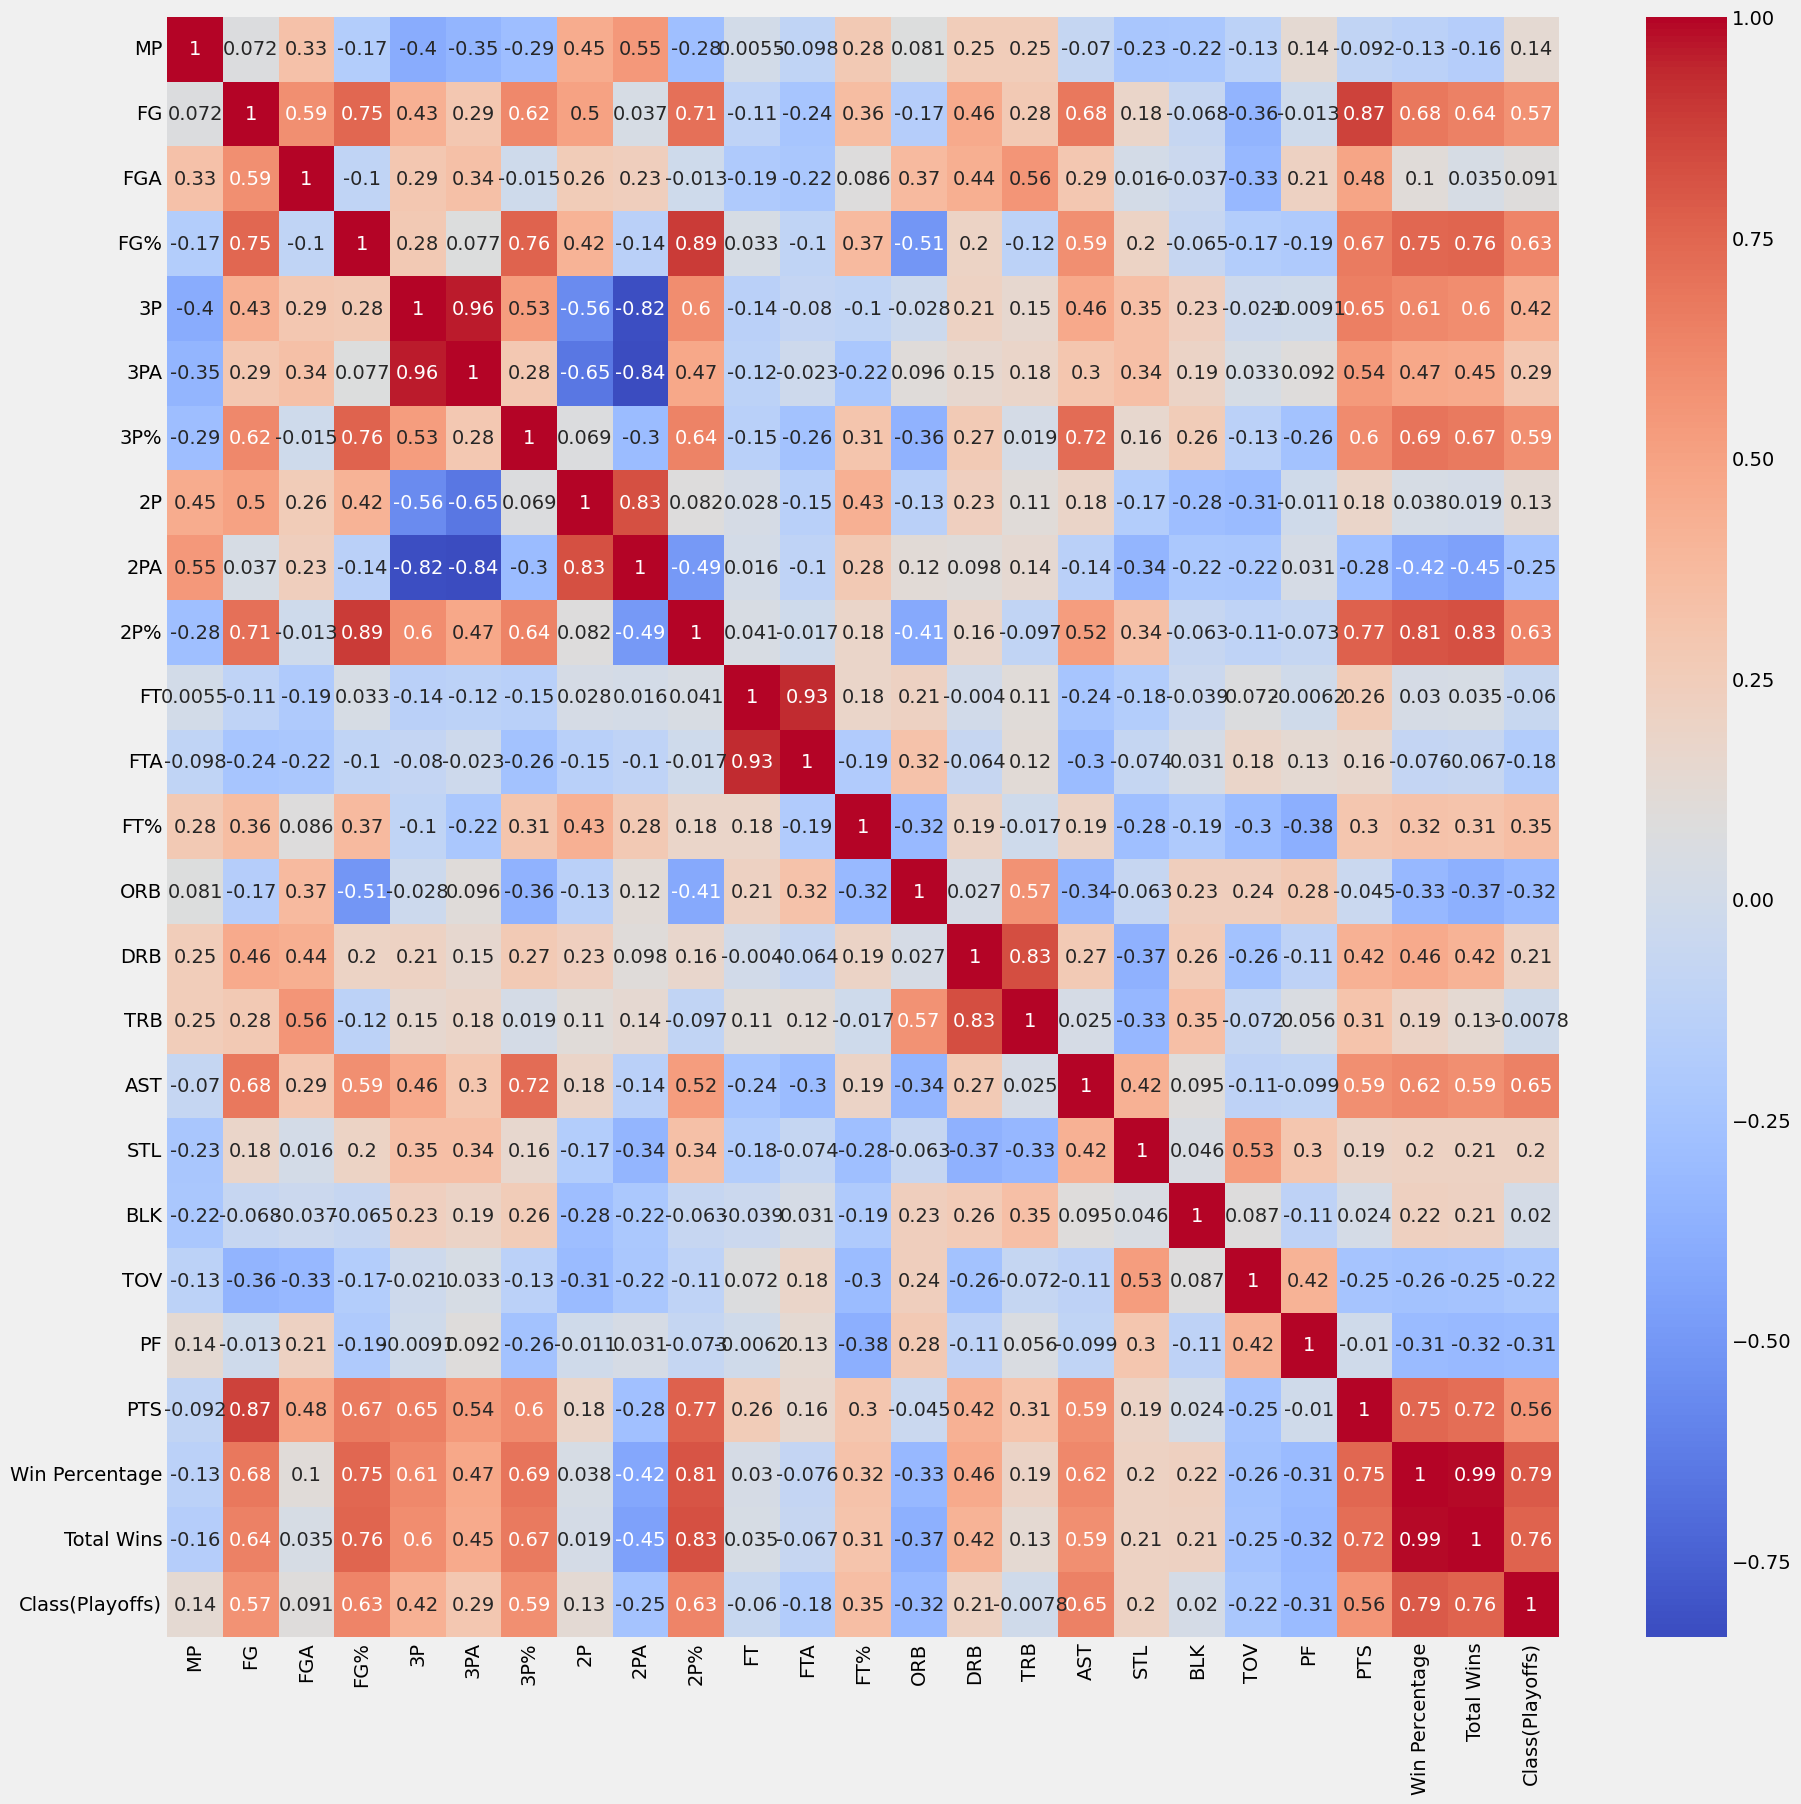

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data=offensive_correlation_matrix,annot=True, cmap = 'coolwarm')

In [ ]:
# Looking at the heatmap we can determine possible important predictors (~ +/-0.25)
offensive_predictors_df = offensive_basketball_stats_df[['FG','FG%','3P','3P%','2P%','FT%','ORB','DRB','AST','TOV','PF','PTS']]
offensive_predictors_df

FG    FG%    3P    3P%    2P%    FT%   ORB   DRB  \
Golden State Warriors   41.6  0.478  10.8  0.398  0.514  0.768  10.4  34.3   
Los Angeles Clippers    39.4  0.473  10.1  0.376  0.519  0.710   9.6  33.1   
Dallas Mavericks        39.7  0.463   8.9  0.352  0.509  0.752  10.5  31.8   
Oklahoma City Thunder   38.8  0.447   7.7  0.339  0.486  0.754  12.8  34.7   
Toronto Raptors         37.9  0.455   8.9  0.352  0.499  0.787  10.7  30.8   
Houston Rockets         37.0  0.444  11.4  0.348  0.506  0.715  11.7  32.0   
San Antonio Spurs       39.1  0.468   8.3  0.367  0.505  0.780   9.8  33.8   
Cleveland Cavaliers     37.7  0.458  10.1  0.367  0.504  0.751  11.1  31.9   
Portland Trail Blazers  38.7  0.450   9.8  0.362  0.491  0.801  10.7  35.1   
Atlanta Hawks           38.1  0.466  10.0  0.380  0.506  0.778   8.7  31.8   
Phoenix Suns            38.8  0.452   8.5  0.341  0.497  0.760  10.9  32.2   
Denver Nuggets          37.8  0.433   8.0  0.325  0.476  0.734  12.3  32.4   
Boston Celtics          38.9  0.443   8.0  0.327  0.488  0.754  11.1  32.7   
Sacramento Kings        36.7  0.455   5.6  0.341  0.484  0.762  10.9  33.3   
Chicago Bulls           36.6  0.442   7.9  0.353  0.474  0.783  11.7  34.0   
New Orleans Pelicans    37.9  0.457   7.1  0.370  0.484  0.751  11.5  32.0   
Washington Wizards      38.3  0.462   6.1  0.360  0.488  0.742  10.5  34.2   
Los Angeles Lakers      37.2  0.435   6.5  0.344  0.461  0.741  11.6  32.3   
Detroit Pistons         37.1  0.432   8.6  0.344  0.468  0.703  12.8  32.1   
Memphis Grizzlies       37.8  0.458   5.2  0.339  0.485  0.773  10.4  32.1   
Brooklyn Nets           37.4  0.451   6.6  0.331  0.489  0.748  10.3  32.0   
Minnesota Timberwolves  36.4  0.438   5.0  0.332  0.461  0.776  11.6  29.3   
Milwaukee Bucks         37.6  0.459   6.6  0.363  0.486  0.757  10.7  31.4   
Indiana Pacers          36.6  0.439   7.5  0.352  0.469  0.756  10.4  34.4   
Orlando Magic           37.5  0.453   6.8  0.347  0.486  0.729  10.0  31.8   
Utah Jazz               35.4  0.447   7.4  0.343  0.486  0.721  12.0  31.9   
Miami Heat              35.2  0.456   6.8  0.335  0.499  0.741   9.1  30.0   
Charlotte Hornets       35.5  0.420   6.1  0.318  0.450  0.748  10.0  34.1   
Philadelphia 76ers      33.7  0.408   8.4  0.320  0.449  0.676  11.9  30.9   
New York Knicks         35.1  0.428   6.8  0.347  0.454  0.769  10.6  29.8   

                         AST   TOV    PF    PTS  
Golden State Warriors   27.4  14.5  19.9  110.0  
Los Angeles Clippers    24.8  12.3  21.3  106.7  
Dallas Mavericks        22.5  13.0  20.0  105.2  
Oklahoma City Thunder   20.5  14.7  22.3  104.0  
Toronto Raptors         20.7  12.9  20.9  104.0  
Houston Rockets         22.2  16.7  22.0  103.9  
San Antonio Spurs       24.4  14.0  19.1  103.2  
Cleveland Cavaliers     22.1  14.3  18.4  103.1  
Portland Trail Blazers  21.9  13.6  18.2  102.8  
Atlanta Hawks           25.7  14.2  17.8  102.5  
Phoenix Suns            20.2  15.1  21.3  102.4  
Denver Nuggets          21.8  14.2  23.0  101.5  
Boston Celtics          24.5  13.8  21.2  101.4  
Sacramento Kings        20.3  16.3  20.7  101.3  
Chicago Bulls           21.7  14.0  18.2  100.8  
New Orleans Pelicans    22.0  13.3  18.7   99.4  
Washington Wizards      24.0  15.0  20.8   98.5  
Los Angeles Lakers      20.9  13.2  21.2   98.5  
Detroit Pistons         21.6  13.4  19.0   98.5  
Memphis Grizzlies       21.7  13.3  19.1   98.3  
Brooklyn Nets           20.9  13.8  19.3   98.0  
Minnesota Timberwolves  21.6  15.0  19.2   97.8  
Milwaukee Bucks         23.6  16.7  22.1   97.8  
Indiana Pacers          21.4  14.0  21.2   97.3  
Orlando Magic           20.6  14.9  20.9   95.7  
Utah Jazz               19.9  15.3  19.3   95.1  
Miami Heat              19.8  14.8  20.0   94.7  
Charlotte Hornets       20.2  11.9  18.2   94.2  
Philadelphia 76ers      20.5  17.7  21.7   92.0  
New York Knicks         21.3  14.7  21.6   91.9

## Defensive/Opponent Stats

In [ ]:
data1 = """
Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Golden State Warriors*,82,240.6,37.0,86.4,.428,7.2,21.4,.337,29.7,65.0,.458,18.7,24.5,.763,11.7,32.8,44.5,21.0,8.3,3.6,16.2,18.8,99.9
2,Los Angeles Clippers*,82,240.6,36.4,82.3,.442,8.3,23.9,.349,28.1,58.4,.481,19.0,25.7,.741,10.6,32.3,42.9,23.2,6.7,3.0,14.3,21.5,100.1
3,Dallas Mavericks*,82,242.4,38.0,84.5,.450,9.0,24.8,.364,29.0,59.7,.485,17.3,22.9,.753,12.3,33.9,46.1,22.3,7.3,3.8,16.3,22.1,102.3
4,Oklahoma City Thunder,82,241.8,37.6,85.5,.440,8.3,24.2,.343,29.3,61.3,.479,18.2,24.5,.745,11.2,31.5,42.7,22.1,7.8,4.6,13.6,20.4,101.8
5,Toronto Raptors*,82,242.1,38.0,82.8,.459,7.7,22.3,.346,30.3,60.5,.501,17.2,23.5,.733,11.2,31.2,42.5,22.8,6.9,5.0,14.4,20.3,100.9
6,Houston Rockets*,82,241.5,37.7,85.2,.443,7.4,22.9,.322,30.3,62.2,.487,17.7,23.6,.751,11.9,32.0,43.8,21.4,8.9,5.3,16.4,21.1,100.5
7,San Antonio Spurs*,82,243.4,37.1,83.7,.444,6.8,18.9,.360,30.3,64.8,.468,15.9,21.4,.745,9.9,32.2,42.1,20.7,7.9,4.4,14.2,19.7,97.0
8,Cleveland Cavaliers*,82,241.2,38.1,83.5,.456,7.7,22.5,.343,30.3,61.0,.497,14.8,19.9,.745,10.8,30.3,41.1,24.1,7.8,4.5,13.3,20.5,98.7
9,Portland Trail Blazers*,82,242.1,38.2,86.9,.439,6.4,18.9,.338,31.8,67.9,.468,15.8,20.9,.758,11.0,33.6,44.6,20.4,8.0,3.6,12.2,18.7,98.6
10,Atlanta Hawks*,82,240.6,36.5,83.1,.439,8.8,25.8,.341,27.7,57.4,.483,15.4,20.1,.764,11.6,32.1,43.6,23.5,7.4,4.9,16.1,19.6,97.1
11,Phoenix Suns,82,242.4,38.4,85.0,.452,7.7,21.9,.352,30.7,63.1,.486,18.8,24.8,.759,11.6,33.7,45.3,21.1,7.9,4.1,15.6,20.3,103.3
12,Denver Nuggets,82,242.4,38.6,84.3,.458,7.7,22.2,.346,30.9,62.0,.498,20.1,26.9,.748,11.0,34.1,45.1,23.1,7.5,6.1,14.4,20.7,105.0
13,Boston Celtics*,82,242.4,38.1,84.7,.450,7.4,22.0,.336,30.7,62.7,.490,17.6,23.3,.755,10.9,33.8,44.7,21.9,7.1,5.3,15.1,18.8,101.2
14,Sacramento Kings,82,242.1,39.5,86.5,.456,8.8,25.1,.349,30.7,61.5,.500,17.3,23.1,.748,11.0,30.2,41.2,23.3,8.7,6.2,12.9,23.9,105.0
15,Chicago Bulls*,82,242.4,37.7,86.7,.435,6.6,19.6,.335,31.2,67.1,.465,15.7,21.0,.749,11.7,31.7,43.4,20.2,7.5,5.4,12.2,21.2,97.8
16,New Orleans Pelicans*,82,241.2,37.9,83.1,.456,6.5,19.6,.335,31.4,63.5,.494,16.2,21.4,.759,10.6,30.9,41.5,20.7,6.8,5.8,12.2,18.7,98.6
17,Washington Wizards*,82,243.4,36.2,83.5,.433,8.0,23.0,.349,28.1,60.5,.465,17.5,23.7,.738,10.0,31.7,41.7,19.9,8.0,4.3,14.0,19.6,97.8
18,Los Angeles Lakers,82,243.0,38.8,83.1,.466,8.5,23.4,.363,30.3,59.7,.507,19.2,25.8,.745,10.0,34.1,44.2,24.0,7.5,4.8,13.0,19.4,105.3
19,Detroit Pistons,82,241.8,37.9,83.1,.456,7.7,21.8,.355,30.1,61.3,.491,16.0,20.7,.772,10.7,33.4,44.1,23.8,7.0,4.8,14.0,19.3,99.5
20,Memphis Grizzlies*,82,242.7,36.0,81.5,.442,8.1,23.0,.351,27.9,58.5,.478,14.9,20.1,.742,10.5,31.9,42.4,20.1,7.4,5.2,15.3,20.3,95.1
21,Brooklyn Nets*,82,243.0,38.4,84.3,.456,8.5,23.7,.358,29.9,60.6,.494,15.6,21.3,.731,11.4,32.9,44.3,23.7,7.8,4.5,13.9,20.0,100.9
22,Minnesota Timberwolves,82,241.5,41.1,84.5,.487,8.5,23.1,.367,32.6,61.4,.531,15.8,20.8,.759,11.6,31.9,43.6,23.6,8.4,5.5,15.2,21.4,106.5
23,Milwaukee Bucks*,82,243.0,35.6,81.5,.437,8.2,24.1,.342,27.3,57.4,.476,18.0,24.3,.742,11.4,31.4,42.9,22.3,8.6,4.8,17.4,20.1,97.4
24,Indiana Pacers,82,242.1,36.0,82.7,.435,7.2,20.9,.345,28.8,61.8,.465,17.9,23.8,.753,9.8,33.0,42.7,19.9,7.5,4.7,12.7,21.4,97.0
25,Orlando Magic,82,240.9,38.0,82.0,.463,8.3,22.6,.368,29.6,59.4,.499,17.2,22.9,.751,10.1,33.4,43.5,23.4,7.7,5.4,14.5,17.9,101.4
26,Utah Jazz,82,240.3,35.8,80.3,.446,7.4,20.4,.362,28.4,60.0,.474,16.0,21.5,.744,9.9,29.3,39.2,19.4,8.2,4.7,13.1,19.6,94.9
27,Miami Heat,82,240.6,36.1,79.5,.454,8.1,23.0,.353,28.0,56.5,.495,17.0,23.2,.730,10.9,30.1,41.0,21.3,7.9,4.4,14.8,20.9,97.3
28,Charlotte Hornets,82,242.7,36.8,83.7,.440,7.9,22.1,.357,28.9,61.5,.470,15.8,20.4,.772,8.9,35.2,44.1,22.1,6.1,5.4,12.6,20.8,97.3
29,Philadelphia 76ers,82,241.5,37.1,82.7,.449,8.0,22.9,.350,29.1,59.8,.487,18.7,24.7,.756,11.5,34.8,46.3,23.7,9.5,5.5,16.8,20.2,101.0
30,New York Knicks,82,242.1,37.0,80.4,.460,8.5,22.3,.380,28.5,58.1,.490,18.8,24.8,.759,11.0,32.5,43.5,21.7,8.0,4.3,14.1,19.1,101.2
"""

data_io = StringIO(data1)

defensive_bball_stats_df = pd.read_csv(data_io)
defensive_bball_stats_df

Rk                     Team   G     MP    FG   FGA    FG%   3P   3PA  \
0    1   Golden State Warriors*  82  240.6  37.0  86.4  0.428  7.2  21.4   
1    2    Los Angeles Clippers*  82  240.6  36.4  82.3  0.442  8.3  23.9   
2    3        Dallas Mavericks*  82  242.4  38.0  84.5  0.450  9.0  24.8   
3    4    Oklahoma City Thunder  82  241.8  37.6  85.5  0.440  8.3  24.2   
4    5         Toronto Raptors*  82  242.1  38.0  82.8  0.459  7.7  22.3   
5    6         Houston Rockets*  82  241.5  37.7  85.2  0.443  7.4  22.9   
6    7       San Antonio Spurs*  82  243.4  37.1  83.7  0.444  6.8  18.9   
7    8     Cleveland Cavaliers*  82  241.2  38.1  83.5  0.456  7.7  22.5   
8    9  Portland Trail Blazers*  82  242.1  38.2  86.9  0.439  6.4  18.9   
9   10           Atlanta Hawks*  82  240.6  36.5  83.1  0.439  8.8  25.8   
10  11             Phoenix Suns  82  242.4  38.4  85.0  0.452  7.7  21.9   
11  12           Denver Nuggets  82  242.4  38.6  84.3  0.458  7.7  22.2   
12  13          Boston Celtics*  82  242.4  38.1  84.7  0.450  7.4  22.0   
13  14         Sacramento Kings  82  242.1  39.5  86.5  0.456  8.8  25.1   
14  15           Chicago Bulls*  82  242.4  37.7  86.7  0.435  6.6  19.6   
15  16    New Orleans Pelicans*  82  241.2  37.9  83.1  0.456  6.5  19.6   
16  17      Washington Wizards*  82  243.4  36.2  83.5  0.433  8.0  23.0   
17  18       Los Angeles Lakers  82  243.0  38.8  83.1  0.466  8.5  23.4   
18  19          Detroit Pistons  82  241.8  37.9  83.1  0.456  7.7  21.8   
19  20       Memphis Grizzlies*  82  242.7  36.0  81.5  0.442  8.1  23.0   
20  21           Brooklyn Nets*  82  243.0  38.4  84.3  0.456  8.5  23.7   
21  22   Minnesota Timberwolves  82  241.5  41.1  84.5  0.487  8.5  23.1   
22  23         Milwaukee Bucks*  82  243.0  35.6  81.5  0.437  8.2  24.1   
23  24           Indiana Pacers  82  242.1  36.0  82.7  0.435  7.2  20.9   
24  25            Orlando Magic  82  240.9  38.0  82.0  0.463  8.3  22.6   
25  26                Utah Jazz  82  240.3  35.8  80.3  0.446  7.4  20.4   
26  27               Miami Heat  82  240.6  36.1  79.5  0.454  8.1  23.0   
27  28        Charlotte Hornets  82  242.7  36.8  83.7  0.440  7.9  22.1   
28  29       Philadelphia 76ers  82  241.5  37.1  82.7  0.449  8.0  22.9   
29  30          New York Knicks  82  242.1  37.0  80.4  0.460  8.5  22.3   

      3P%  ...    FT%   ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  
0   0.337  ...  0.763  11.7  32.8  44.5  21.0  8.3  3.6  16.2  18.8   99.9  
1   0.349  ...  0.741  10.6  32.3  42.9  23.2  6.7  3.0  14.3  21.5  100.1  
2   0.364  ...  0.753  12.3  33.9  46.1  22.3  7.3  3.8  16.3  22.1  102.3  
3   0.343  ...  0.745  11.2  31.5  42.7  22.1  7.8  4.6  13.6  20.4  101.8  
4   0.346  ...  0.733  11.2  31.2  42.5  22.8  6.9  5.0  14.4  20.3  100.9  
5   0.322  ...  0.751  11.9  32.0  43.8  21.4  8.9  5.3  16.4  21.1  100.5  
6   0.360  ...  0.745   9.9  32.2  42.1  20.7  7.9  4.4  14.2  19.7   97.0  
7   0.343  ...  0.745  10.8  30.3  41.1  24.1  7.8  4.5  13.3  20.5   98.7  
8   0.338  ...  0.758  11.0  33.6  44.6  20.4  8.0  3.6  12.2  18.7   98.6  
9   0.341  ...  0.764  11.6  32.1  43.6  23.5  7.4  4.9  16.1  19.6   97.1  
10  0.352  ...  0.759  11.6  33.7  45.3  21.1  7.9  4.1  15.6  20.3  103.3  
11  0.346  ...  0.748  11.0  34.1  45.1  23.1  7.5  6.1  14.4  20.7  105.0  
12  0.336  ...  0.755  10.9  33.8  44.7  21.9  7.1  5.3  15.1  18.8  101.2  
13  0.349  ...  0.748  11.0  30.2  41.2  23.3  8.7  6.2  12.9  23.9  105.0  
14  0.335  ...  0.749  11.7  31.7  43.4  20.2  7.5  5.4  12.2  21.2   97.8  
15  0.335  ...  0.759  10.6  30.9  41.5  20.7  6.8  5.8  12.2  18.7   98.6  
16  0.349  ...  0.738  10.0  31.7  41.7  19.9  8.0  4.3  14.0  19.6   97.8  
17  0.363  ...  0.745  10.0  34.1  44.2  24.0  7.5  4.8  13.0  19.4  105.3  
18  0.355  ...  0.772  10.7  33.4  44.1  23.8  7.0  4.8  14.0  19.3   99.5  
19  0.351  ...  0.742  10.5  31.9  42.4  20.1  7.4  5.2  15.3  20.3   95.1  
20  0.358  ...  0.731  11.4  3

In [ ]:
defensive_bball_stats_df = defensive_bball_stats_df.merge(win_percentage, how='left')
defensive_bball_stats_df = defensive_bball_stats_df.drop(columns=['Rk','Team','G'])
defensive_bball_stats_df = defensive_bball_stats_df.dropna()
defensive_bball_stats_df.index = Team_Names
defensive_bball_stats_df

MP    FG   FGA    FG%   3P   3PA    3P%    2P  \
Golden State Warriors   240.6  37.0  86.4  0.428  7.2  21.4  0.337  29.7   
Los Angeles Clippers    240.6  36.4  82.3  0.442  8.3  23.9  0.349  28.1   
Dallas Mavericks        242.4  38.0  84.5  0.450  9.0  24.8  0.364  29.0   
Oklahoma City Thunder   241.8  37.6  85.5  0.440  8.3  24.2  0.343  29.3   
Toronto Raptors         242.1  38.0  82.8  0.459  7.7  22.3  0.346  30.3   
Houston Rockets         241.5  37.7  85.2  0.443  7.4  22.9  0.322  30.3   
San Antonio Spurs       243.4  37.1  83.7  0.444  6.8  18.9  0.360  30.3   
Cleveland Cavaliers     241.2  38.1  83.5  0.456  7.7  22.5  0.343  30.3   
Portland Trail Blazers  242.1  38.2  86.9  0.439  6.4  18.9  0.338  31.8   
Atlanta Hawks           240.6  36.5  83.1  0.439  8.8  25.8  0.341  27.7   
Phoenix Suns            242.4  38.4  85.0  0.452  7.7  21.9  0.352  30.7   
Denver Nuggets          242.4  38.6  84.3  0.458  7.7  22.2  0.346  30.9   
Boston Celtics          242.4  38.1  84.7  0.450  7.4  22.0  0.336  30.7   
Sacramento Kings        242.1  39.5  86.5  0.456  8.8  25.1  0.349  30.7   
Chicago Bulls           242.4  37.7  86.7  0.435  6.6  19.6  0.335  31.2   
New Orleans Pelicans    241.2  37.9  83.1  0.456  6.5  19.6  0.335  31.4   
Washington Wizards      243.4  36.2  83.5  0.433  8.0  23.0  0.349  28.1   
Los Angeles Lakers      243.0  38.8  83.1  0.466  8.5  23.4  0.363  30.3   
Detroit Pistons         241.8  37.9  83.1  0.456  7.7  21.8  0.355  30.1   
Memphis Grizzlies       242.7  36.0  81.5  0.442  8.1  23.0  0.351  27.9   
Brooklyn Nets           243.0  38.4  84.3  0.456  8.5  23.7  0.358  29.9   
Minnesota Timberwolves  241.5  41.1  84.5  0.487  8.5  23.1  0.367  32.6   
Milwaukee Bucks         243.0  35.6  81.5  0.437  8.2  24.1  0.342  27.3   
Indiana Pacers          242.1  36.0  82.7  0.435  7.2  20.9  0.345  28.8   
Orlando Magic           240.9  38.0  82.0  0.463  8.3  22.6  0.368  29.6   
Utah Jazz               240.3  35.8  80.3  0.446  7.4  20.4  0.362  28.4   
Miami Heat              240.6  36.1  79.5  0.454  8.1  23.0  0.353  28.0   
Charlotte Hornets       242.7  36.8  83.7  0.440  7.9  22.1  0.357  28.9   
Philadelphia 76ers      241.5  37.1  82.7  0.449  8.0  22.9  0.350  29.1   
New York Knicks         242.1  37.0  80.4  0.460  8.5  22.3  0.380  28.5   

                         2PA    2P%  ...   TRB   AST  STL  BLK   TOV    PF  \
Golden State Warriors   65.0  0.458  ...  44.5  21.0  8.3  3.6  16.2  18.8   
Los Angeles Clippers    58.4  0.481  ...  42.9  23.2  6.7  3.0  14.3  21.5   
Dallas Mavericks        59.7  0.485  ...  46.1  22.3  7.3  3.8  16.3  22.1   
Oklahoma City Thunder   61.3  0.479  ...  42.7  22.1  7.8  4.6  13.6  20.4   
Toronto Raptors         60.5  0.501  ...  42.5  22.8  6.9  5.0  14.4  20.3   
Houston Rockets         62.2  0.487  ...  43.8  21.4  8.9  5.3  16.4  21.1   
San Antonio Spurs       64.8  0.468  ...  42.1  20.7  7.9  4.4  14.2  19.7   
Cleveland Cavaliers     61.0  0.497  ...  41.1  24.1  7.8  4.5  13.3  20.5   
Portland Trail Blazers  67.9  0.468  ...  44.6  20.4  8.0  3.6  12.2  18.7   
Atlanta Hawks           57.4  0.483  ...  43.6  23.5  7.4  4.9  16.1  19.6   
Phoenix Suns            63.1  0.486  ...  45.3  21.1  7.9  4.1  15.6  20.3   
Denver Nuggets          62.0  0.498  ...  45.1  23.1  7.5  6.1  14.4  20.7   
Boston Celtics          62.7  0.490  ...  44.7  21.9  7.1  5.3  15.1  18.8   
Sacramento Kings        61.5  0.500  ...  41.2  23.3  8.7  6.2  12.9  23.9   
Chicago Bulls           67.1  0.465  ...  43.4  20.2  7.5  5.4  12.2  21.2   
New Orleans Pelicans    63.5  0.494  ...  41.5  20.7  6.8  5.8  12.2  18.7   
Washington Wizards      60.5  0.465  ...  41.7  19.9  8.0  4.3  14.0  19.6   
Los Angeles Lakers      59.7  0.507  ...  44.2  24.0  7.5  4.8  13.0  19.4   
Detroit Pistons         61.3  0.491  ...  44.1  23.8  7.0  4.8  14.0  19.3   
Memphis Grizzlies       58.5  0.478  ...  42.4  20.1  7.4  5.2  15.3  20.3   
Brooklyn Nets           60.6  0.

In [ ]:
defensive_correlation_matrix = defensive_bball_stats_df.corr()
defensive_correlation_matrix

MP        FG       FGA       FG%        3P       3PA  \
MP               1.000000  0.103897  0.222587 -0.061160  0.000451 -0.061773   
FG               0.103897  1.000000  0.552093  0.724399  0.118725  0.058248   
FGA              0.222587  0.552093  1.000000 -0.174188 -0.267241 -0.118494   
FG%             -0.061160  0.724399 -0.174188  1.000000  0.353399  0.157187   
3P               0.000451  0.118725 -0.267241  0.353399  1.000000  0.918968   
3PA             -0.061773  0.058248 -0.118494  0.157187  0.918968  1.000000   
3P%              0.115784  0.119914 -0.469383  0.530847  0.514574  0.137441   
2P               0.097422  0.851307  0.646888  0.474809 -0.418797 -0.432197   
2PA              0.190565  0.348292  0.774093 -0.222301 -0.771819 -0.720112   
2P%             -0.128588  0.710122 -0.135757  0.948489  0.457010  0.368379   
FT               0.034399 -0.002867 -0.003783 -0.004677  0.181868  0.202882   
FTA              0.061568 -0.032495 -0.048209 -0.003294  0.193546  0.219745   
FT%             -0.153556  0.178958  0.283010 -0.020710 -0.153622 -0.175997   
ORB             -0.157729  0.314093  0.376556  0.069761  0.169910  0.315638   
DRB              0.349293  0.168644  0.244255  0.000986  0.048981 -0.017378   
TRB              0.249712  0.311813  0.396502  0.048609  0.126718  0.132189   
AST             -0.097514  0.497833  0.015627  0.569826  0.598307  0.590846   
STL             -0.078247  0.079805  0.093634  0.019245  0.084829  0.117519   
BLK              0.107552  0.336642  0.048564  0.358048  0.004284  0.041928   
TOV             -0.089474 -0.148340 -0.143208 -0.047072  0.382881  0.481989   
PF               0.082093  0.188305  0.208002  0.045859  0.344289  0.406275   
PTS              0.104237  0.830547  0.384778  0.659151  0.403906  0.348365   
Win Percentage  -0.126547 -0.380518  0.273966 -0.673006 -0.350080 -0.115441   
Total Wins      -0.164979 -0.410533  0.217860 -0.661612 -0.339999 -0.106743   
Class(Playoffs)  0.136396 -0.193106  0.239232 -0.422775 -0.279052 -0.085167   

                      3P%        2P       2PA       2P%  ...       TRB  \
MP               0.115784  0.097422  0.190565 -0.128588  ...  0.249712   
FG               0.119914  0.851307  0.348292  0.710122  ...  0.311813   
FGA             -0.469383  0.646888  0.774093 -0.135757  ...  0.396502   
FG%              0.530847  0.474809 -0.222301  0.948489  ...  0.048609   
3P               0.514574 -0.418797 -0.771819  0.457010  ...  0.126718   
3PA              0.137441 -0.432197 -0.720112  0.368379  ...  0.132189   
3P%              1.000000 -0.161646 -0.413951  0.332631  ...  0.003624   
2P              -0.161646  1.000000  0.726862  0.407266  ...  0.220283   
2PA             -0.413951  0.726862  1.000000 -0.330461  ...  0.185289   
2P%              0.332631  0.407266 -0.330461  1.000000  ...  0.050637   
FT               0.026178 -0.098979 -0.136247  0.035492  ...  0.375137   
FTA              0.019956 -0.131477 -0.177880  0.047778  ...  0.288404   
FT%             -0.008329  0.240106  0.309183 -0.090822  ...  0.439564   
ORB             -0.288790  0.201484  0.062712  0.198648  ...  0.427394   
DRB              0.145974  0.128775  0.173080 -0.062650  ...  0.882040   
TRB              0.003624  0.220283  0.185289  0.050637  ...  1.000000   
AST              0.225154  0.132288 -0.367581  0.678638  ...  0.332869   
STL             -0.054879  0.023694 -0.006925  0.054570  ...  0.016128   
BLK             -0.109675  0.310308  0.007513  0.415456  ... -0.069661   
TOV             -0.057145 -0.344090 -0.409541  0.075753  ...  0.409396   
PF              -0.049977  0.004309 -0.112804  0.147610  ... -0.090582   
PTS              0.220710  0.546038  0.044577  0.690749  ...  0.461548   
Win Percentage  -0.612018 -0.164541  0.266444 -0.576196  ... -0.157033   
Total Wins      -0.604172 -0.196740  0.221472 -0.559730  ... -0.193959   
Class(Playoffs) -0.511540 -0.031440  0.221598 -0.334630  ... -0.020724   

                      AST       STL       B

<Axes: >

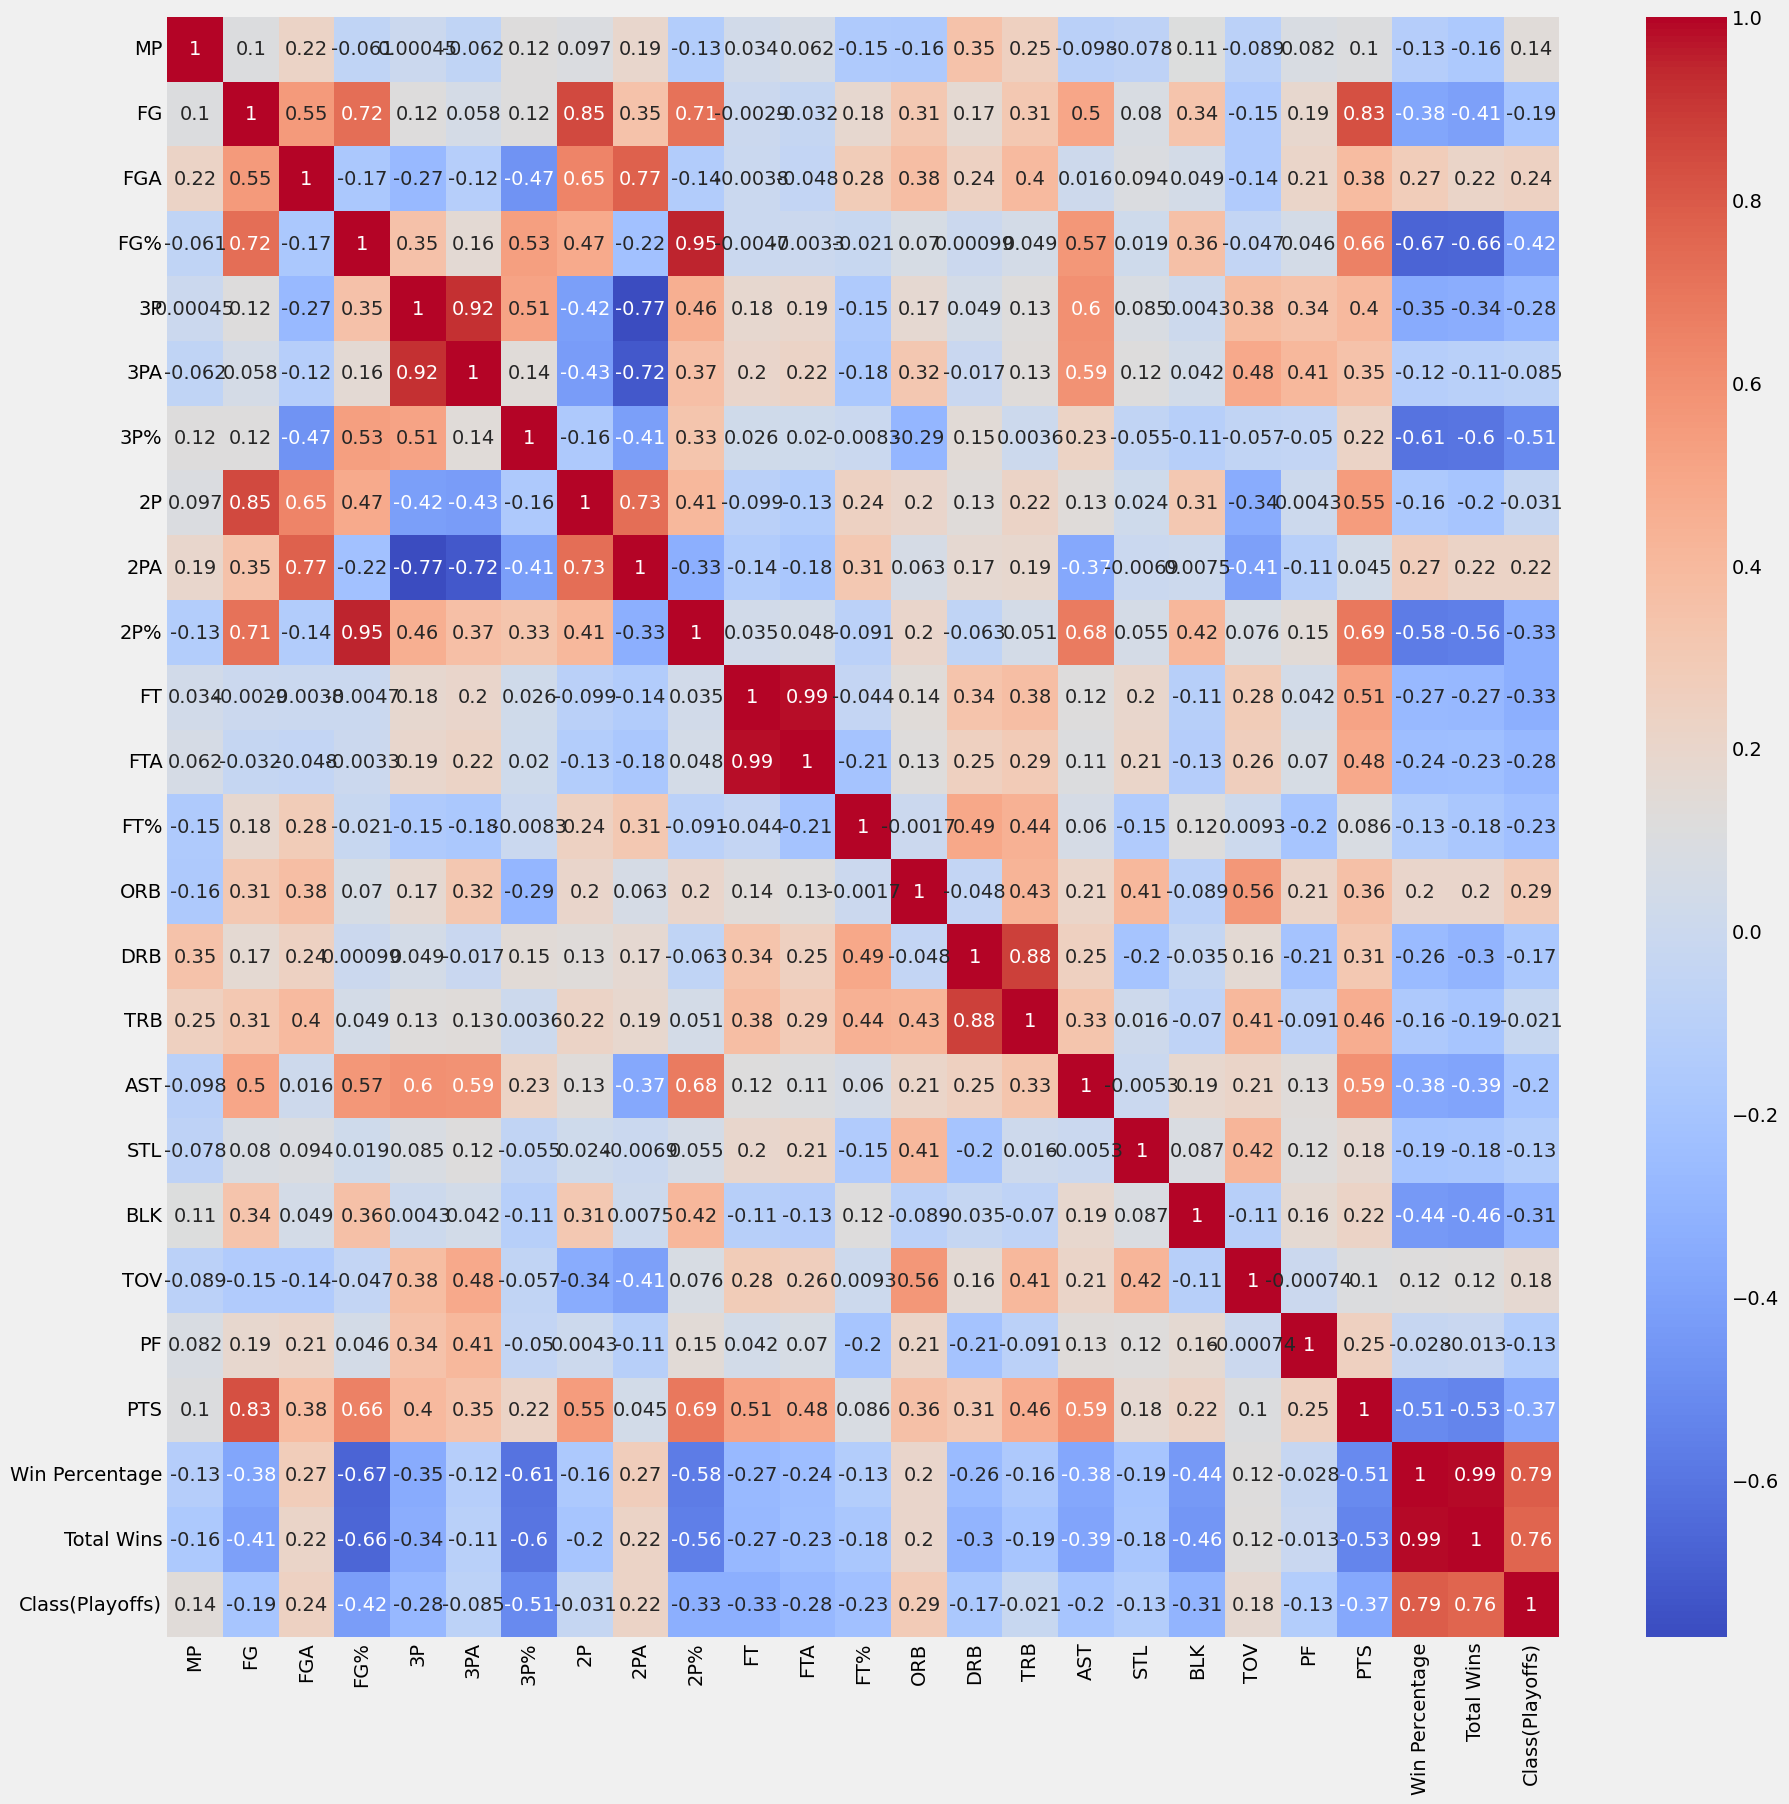

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=defensive_correlation_matrix,annot=True, cmap = 'coolwarm')

In [ ]:
# Looking at the heatmap we can determine possible important predictors (~ +/-0.25)
defensive_predictors = defensive_bball_stats_df[['FG','FG%','3P','3P%','2P%','FT','AST','BLK','PTS']]
defensive_predictors = defensive_predictors.rename(columns={'FG':'oppFG','FG%':'oppFG%','3P':'opp3P','3P%':'opp3P%','2P%':'opp2P%','FT':'oppFT','AST':'oppAST','BLK':'oppBLK','PTS':'oppPTS'})
defensive_predictors

oppFG  oppFG%  opp3P  opp3P%  opp2P%  oppFT  oppAST  \
Golden State Warriors    37.0   0.428    7.2   0.337   0.458   18.7    21.0   
Los Angeles Clippers     36.4   0.442    8.3   0.349   0.481   19.0    23.2   
Dallas Mavericks         38.0   0.450    9.0   0.364   0.485   17.3    22.3   
Oklahoma City Thunder    37.6   0.440    8.3   0.343   0.479   18.2    22.1   
Toronto Raptors          38.0   0.459    7.7   0.346   0.501   17.2    22.8   
Houston Rockets          37.7   0.443    7.4   0.322   0.487   17.7    21.4   
San Antonio Spurs        37.1   0.444    6.8   0.360   0.468   15.9    20.7   
Cleveland Cavaliers      38.1   0.456    7.7   0.343   0.497   14.8    24.1   
Portland Trail Blazers   38.2   0.439    6.4   0.338   0.468   15.8    20.4   
Atlanta Hawks            36.5   0.439    8.8   0.341   0.483   15.4    23.5   
Phoenix Suns             38.4   0.452    7.7   0.352   0.486   18.8    21.1   
Denver Nuggets           38.6   0.458    7.7   0.346   0.498   20.1    23.1   
Boston Celtics           38.1   0.450    7.4   0.336   0.490   17.6    21.9   
Sacramento Kings         39.5   0.456    8.8   0.349   0.500   17.3    23.3   
Chicago Bulls            37.7   0.435    6.6   0.335   0.465   15.7    20.2   
New Orleans Pelicans     37.9   0.456    6.5   0.335   0.494   16.2    20.7   
Washington Wizards       36.2   0.433    8.0   0.349   0.465   17.5    19.9   
Los Angeles Lakers       38.8   0.466    8.5   0.363   0.507   19.2    24.0   
Detroit Pistons          37.9   0.456    7.7   0.355   0.491   16.0    23.8   
Memphis Grizzlies        36.0   0.442    8.1   0.351   0.478   14.9    20.1   
Brooklyn Nets            38.4   0.456    8.5   0.358   0.494   15.6    23.7   
Minnesota Timberwolves   41.1   0.487    8.5   0.367   0.531   15.8    23.6   
Milwaukee Bucks          35.6   0.437    8.2   0.342   0.476   18.0    22.3   
Indiana Pacers           36.0   0.435    7.2   0.345   0.465   17.9    19.9   
Orlando Magic            38.0   0.463    8.3   0.368   0.499   17.2    23.4   
Utah Jazz                35.8   0.446    7.4   0.362   0.474   16.0    19.4   
Miami Heat               36.1   0.454    8.1   0.353   0.495   17.0    21.3   
Charlotte Hornets        36.8   0.440    7.9   0.357   0.470   15.8    22.1   
Philadelphia 76ers       37.1   0.449    8.0   0.350   0.487   18.7    23.7   
New York Knicks          37.0   0.460    8.5   0.380   0.490   18.8    21.7   

                        oppBLK  oppPTS  
Golden State Warriors      3.6    99.9  
Los Angeles Clippers       3.0   100.1  
Dallas Mavericks           3.8   102.3  
Oklahoma City Thunder      4.6   101.8  
Toronto Raptors            5.0   100.9  
Houston Rockets            5.3   100.5  
San Antonio Spurs          4.4    97.0  
Cleveland Cavaliers        4.5    98.7  
Portland Trail Blazers     3.6    98.6  
Atlanta Hawks              4.9    97.1  
Phoenix Suns               4.1   103.3  
Denver Nuggets             6.1   105.0  
Boston Celtics             5.3   101.2  
Sacramento Kings           6.2   105.0  
Chicago Bulls              5.4    97.8  
New Orleans Pelicans       5.8    98.6  
Washington Wizards         4.3    97.8  
Los Angeles Lakers         4.8   105.3  
Detroit Pistons            4.8    99.5  
Memphis Grizzlies          5.2    95.1  
Brooklyn Nets              4.5   100.9  
Minnesota Timberwolves     5.5   106.5  
Milwaukee Bucks            4.8    97.4  
Indiana Pacers             4.7    97.0  
Orlando Magic              5.4   101.4  
Utah Jazz                  4.7    94.9  
Miami Heat                 4.4    97.3  
Charlotte Hornets          5.4    97.3  
Philadelphia 76ers         5.5   101.0  
New York Knicks            4.3   101.2

# Combined Stats

In [ ]:
predictors_combined = offensive_predictors_df.join(defensive_predictors, how='left')
predictors_combined

FG    FG%    3P    3P%    2P%    FT%   ORB   DRB  \
Golden State Warriors   41.6  0.478  10.8  0.398  0.514  0.768  10.4  34.3   
Los Angeles Clippers    39.4  0.473  10.1  0.376  0.519  0.710   9.6  33.1   
Dallas Mavericks        39.7  0.463   8.9  0.352  0.509  0.752  10.5  31.8   
Oklahoma City Thunder   38.8  0.447   7.7  0.339  0.486  0.754  12.8  34.7   
Toronto Raptors         37.9  0.455   8.9  0.352  0.499  0.787  10.7  30.8   
Houston Rockets         37.0  0.444  11.4  0.348  0.506  0.715  11.7  32.0   
San Antonio Spurs       39.1  0.468   8.3  0.367  0.505  0.780   9.8  33.8   
Cleveland Cavaliers     37.7  0.458  10.1  0.367  0.504  0.751  11.1  31.9   
Portland Trail Blazers  38.7  0.450   9.8  0.362  0.491  0.801  10.7  35.1   
Atlanta Hawks           38.1  0.466  10.0  0.380  0.506  0.778   8.7  31.8   
Phoenix Suns            38.8  0.452   8.5  0.341  0.497  0.760  10.9  32.2   
Denver Nuggets          37.8  0.433   8.0  0.325  0.476  0.734  12.3  32.4   
Boston Celtics          38.9  0.443   8.0  0.327  0.488  0.754  11.1  32.7   
Sacramento Kings        36.7  0.455   5.6  0.341  0.484  0.762  10.9  33.3   
Chicago Bulls           36.6  0.442   7.9  0.353  0.474  0.783  11.7  34.0   
New Orleans Pelicans    37.9  0.457   7.1  0.370  0.484  0.751  11.5  32.0   
Washington Wizards      38.3  0.462   6.1  0.360  0.488  0.742  10.5  34.2   
Los Angeles Lakers      37.2  0.435   6.5  0.344  0.461  0.741  11.6  32.3   
Detroit Pistons         37.1  0.432   8.6  0.344  0.468  0.703  12.8  32.1   
Memphis Grizzlies       37.8  0.458   5.2  0.339  0.485  0.773  10.4  32.1   
Brooklyn Nets           37.4  0.451   6.6  0.331  0.489  0.748  10.3  32.0   
Minnesota Timberwolves  36.4  0.438   5.0  0.332  0.461  0.776  11.6  29.3   
Milwaukee Bucks         37.6  0.459   6.6  0.363  0.486  0.757  10.7  31.4   
Indiana Pacers          36.6  0.439   7.5  0.352  0.469  0.756  10.4  34.4   
Orlando Magic           37.5  0.453   6.8  0.347  0.486  0.729  10.0  31.8   
Utah Jazz               35.4  0.447   7.4  0.343  0.486  0.721  12.0  31.9   
Miami Heat              35.2  0.456   6.8  0.335  0.499  0.741   9.1  30.0   
Charlotte Hornets       35.5  0.420   6.1  0.318  0.450  0.748  10.0  34.1   
Philadelphia 76ers      33.7  0.408   8.4  0.320  0.449  0.676  11.9  30.9   
New York Knicks         35.1  0.428   6.8  0.347  0.454  0.769  10.6  29.8   

                         AST   TOV  ...    PTS  oppFG  oppFG%  opp3P  opp3P%  \
Golden State Warriors   27.4  14.5  ...  110.0   37.0   0.428    7.2   0.337   
Los Angeles Clippers    24.8  12.3  ...  106.7   36.4   0.442    8.3   0.349   
Dallas Mavericks        22.5  13.0  ...  105.2   38.0   0.450    9.0   0.364   
Oklahoma City Thunder   20.5  14.7  ...  104.0   37.6   0.440    8.3   0.343   
Toronto Raptors         20.7  12.9  ...  104.0   38.0   0.459    7.7   0.346   
Houston Rockets         22.2  16.7  ...  103.9   37.7   0.443    7.4   0.322   
San Antonio Spurs       24.4  14.0  ...  103.2   37.1   0.444    6.8   0.360   
Cleveland Cavaliers     22.1  14.3  ...  103.1   38.1   0.456    7.7   0.343   
Portland Trail Blazers  21.9  13.6  ...  102.8   38.2   0.439    6.4   0.338   
Atlanta Hawks           25.7  14.2  ...  102.5   36.5   0.439    8.8   0.341   
Phoenix Suns            20.2  15.1  ...  102.4   38.4   0.452    7.7   0.352   
Denver Nuggets          21.8  14.2  ...  101.5   38.6   0.458    7.7   0.346   
Boston Celtics          24.5  13.8  ...  101.4   38.1   0.450    7.4   0.336   
Sacramento Kings        20.3  16.3  ...  101.3   39.5   0.456    8.8   0.349   
Chicago Bulls           21.7  14.0  ...  100.8   37.7   0.435    6.6   0.335   
New Orleans Pelicans    22.0  13.3  ...   99.4   37.9   0.456    6.5   0.335   
Washington Wizards      24.0  15.0  ...   98.5   36.2   0.433    8.0   0.349   
Los Angeles Lakers      20.9  13.2  ...   98.5   38.8   0.466    8.5   0.363   
Detroit Pistons         21.6  13.4  ...   98.5   37.9   0.456    7.7   0.355   
Memphis

In [ ]:
#predictors
print(predictors_combined.columns)

Index(['FG', 'FG%', '3P', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'AST', 'TOV',
       'PF', 'PTS', 'oppFG', 'oppFG%', 'opp3P', 'opp3P%', 'opp2P%', 'oppFT',
       'oppAST', 'oppBLK', 'oppPTS'],
      dtype='object')


In [ ]:
#win_df with indices as team names and asterisks removed
win_df = win_percentage.copy()
win_df['Team'] = win_df['Team'].str.replace('*','')
win_df.set_index('Team',inplace=True)
win_df.index.name = None
win_df

<ipython-input-17-2779fe4a1e4c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  win_df['Team'] = win_df['Team'].str.replace('*','')


Win Percentage  Total Wins  Class(Playoffs)
Golden State Warriors            0.817          67                1
Los Angeles Clippers             0.683          56                1
Dallas Mavericks                 0.610          50                1
Oklahoma City Thunder            0.549          45                0
Toronto Raptors                  0.598          49                1
Houston Rockets                  0.683          56                1
San Antonio Spurs                0.671          55                1
Cleveland Cavaliers              0.646          53                1
Portland Trail Blazers           0.622          51                1
Atlanta Hawks                    0.732          60                1
Phoenix Suns                     0.476          39                0
Denver Nuggets                   0.366          30                0
Boston Celtics                   0.488          40                1
Sacramento Kings                 0.354          29                0
Chicago Bulls                    0.610          50                1
New Orleans Pelicans             0.549          45                1
Washington Wizards               0.561          46                1
Los Angeles Lakers               0.256          21                0
Detroit Pistons                  0.390          32                0
Memphis Grizzlies                0.671          55                1
Brooklyn Nets                    0.463          38                1
Minnesota Timberwolves           0.195          16                0
Milwaukee Bucks                  0.500          41                1
Indiana Pacers                   0.463          38                0
Orlando Magic                    0.305          25                0
Utah Jazz                        0.463          38                0
Miami Heat                       0.451          47                0
Charlotte Hornets                0.402          33                0
Philadelphia 76ers               0.220          18                0
New York Knicks                  0.207          17                0

In [ ]:
#summary stats
predictors_combined.describe()

FG        FG%         3P        3P%        2P%        FT%  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   37.516667   0.449000   7.850000   0.349100   0.485767   0.750667   
std     1.597646   0.015483   1.651488   0.018385   0.018746   0.027081   
min    33.700000   0.408000   5.000000   0.318000   0.449000   0.676000   
25%    36.625000   0.439750   6.650000   0.339000   0.474500   0.741000   
50%    37.650000   0.451500   7.800000   0.347000   0.486000   0.753000   
75%    38.600000   0.458000   8.825000   0.361500   0.499000   0.768750   
max    41.600000   0.478000  11.400000   0.398000   0.519000   0.801000   

             ORB        DRB        AST        TOV  ...         PTS      oppFG  \
count  30.000000  30.000000  30.000000  30.000000  ...   30.000000  30.000000   
mean   10.876667  32.406667  22.023333  14.353333  ...  100.016667  37.520000   
std     0.988096   1.467565   1.858194   1.303770  ...    4.275760   1.203558   
min     8.700000  29.300000  19.800000  11.900000  ...   91.900000  35.600000   
25%    10.400000  31.800000  20.625000  13.450000  ...   97.800000  36.575000   
50%    10.700000  32.100000  21.650000  14.200000  ...  100.100000  37.700000   
75%    11.600000  33.675000  22.425000  14.975000  ...  103.025000  38.100000   
max    12.800000  35.100000  27.400000  17.700000  ...  110.000000  41.100000   

          oppFG%      opp3P     opp3P%     opp2P%      oppFT     oppAST  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.449033   7.840000   0.349867   0.485400  17.136667  22.023333   
std     0.012141   0.691625   0.012204   0.015516   1.418956   1.444295   
min     0.428000   6.400000   0.322000   0.458000  14.800000  19.400000   
25%     0.440000   7.400000   0.342250   0.474500  15.825000  20.775000   
50%     0.449500   7.950000   0.349000   0.486500  17.250000  22.100000   
75%     0.456000   8.300000   0.357750   0.494750  18.150000  23.375000   
max     0.487000   9.000000   0.380000   0.531000  20.100000  24.100000   

          oppBLK      oppPTS  
count  30.000000   30.000000  
mean    4.796667  100.013333  
std     0.744860    2.998820  
min     3.000000   94.900000  
25%     4.400000   97.500000  
50%     4.800000  100.000000  
75%     5.375000  101.350000  
max     6.200000  106.500000  

[8 rows x 21 columns]

In [ ]:
# For Exploratory Analysis
# Sidenote: There are currently 21 good predictor variables but if we feel that, that is too much then we can shorten the list of possible good predictors
scaler = StandardScaler()
X1 = predictors_combined

X = scaler.fit_transform(X1)
new_predictors = predictors_combined.copy()
new_predictors.columns = X[1]
y = win_df[['Win Percentage']]
y1 = win_df[['Total Wins']] # Can make models to predict total wins or win percentage to see which is best
y2 = win_df[['Class(Playoffs)']]

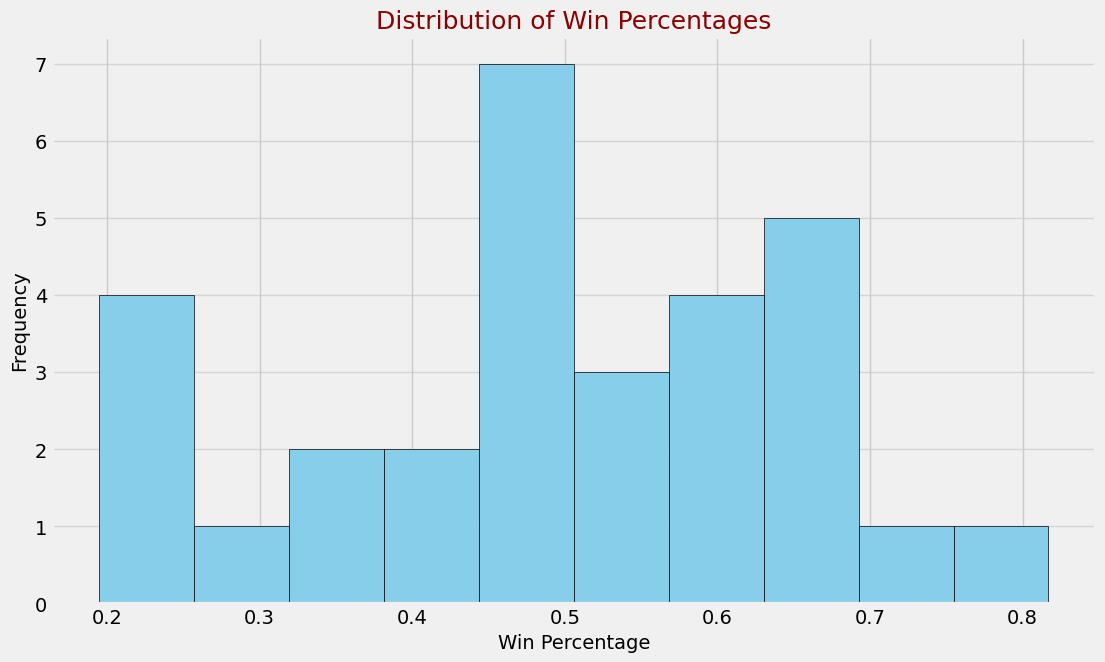

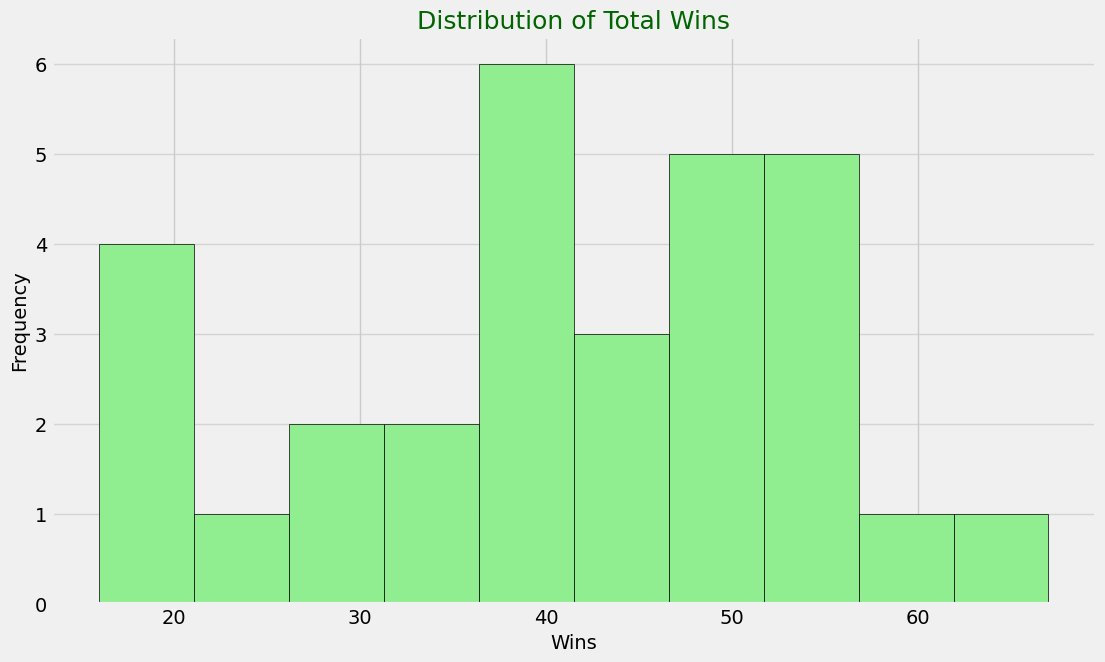

In [ ]:

plt.figure(figsize=(12, 7))
plt.hist(y, color='skyblue', edgecolor='black')
plt.title('Distribution of Win Percentages', fontsize=18, color='darkred')
plt.xlabel('Win Percentage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(12, 7))
plt.hist(y1, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Wins', fontsize=18, color='darkgreen')
plt.xlabel('Wins', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

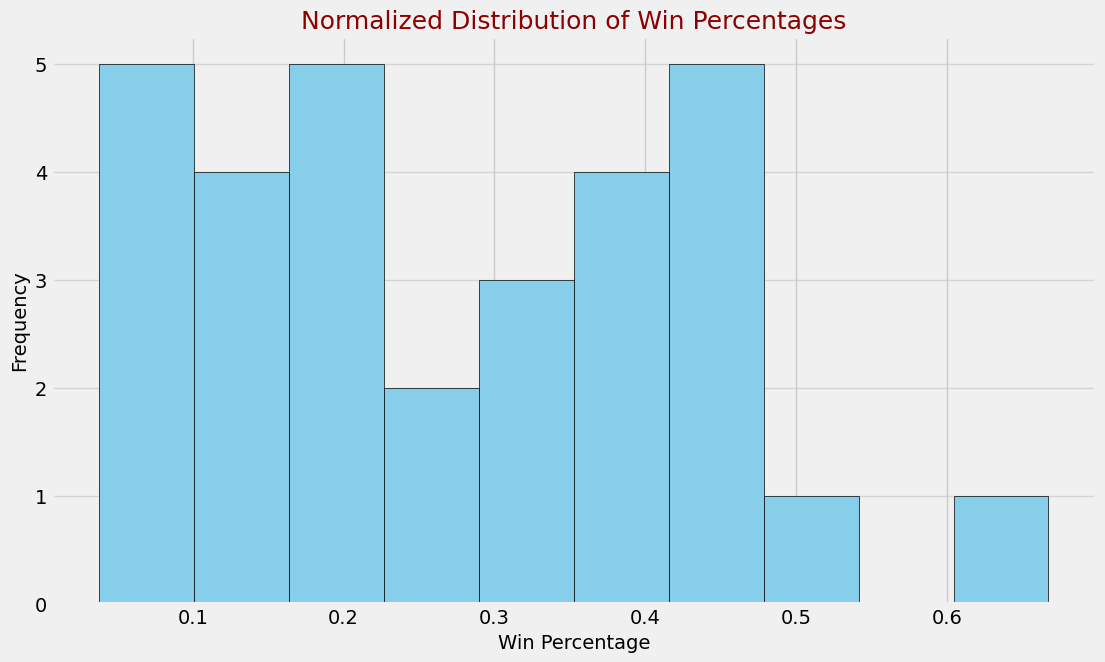

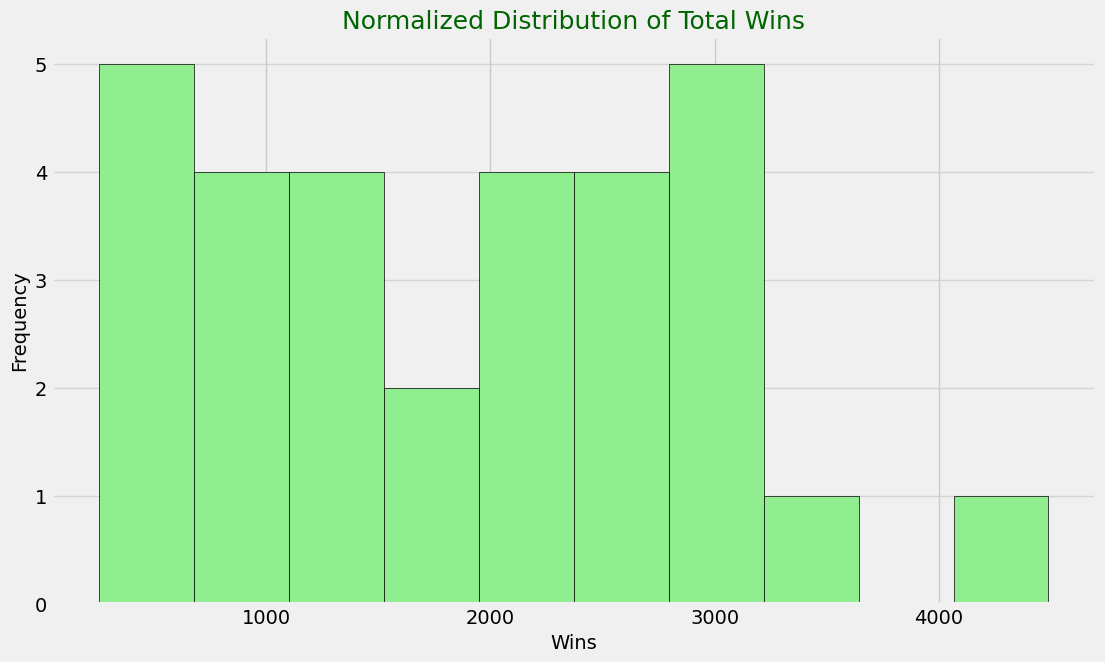

In [ ]:
plt.figure(figsize=(12, 7))
plt.hist(y**2, color='skyblue', edgecolor='black')
plt.title('Normalized Distribution of Win Percentages', fontsize=18, color='darkred')
plt.xlabel('Win Percentage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(12, 7))
plt.hist(y1**2, color='lightgreen', edgecolor='black')
plt.title('Normalized Distribution of Total Wins', fontsize=18, color='darkgreen')
plt.xlabel('Wins', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

<ipython-input-22-c4a71484a952>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


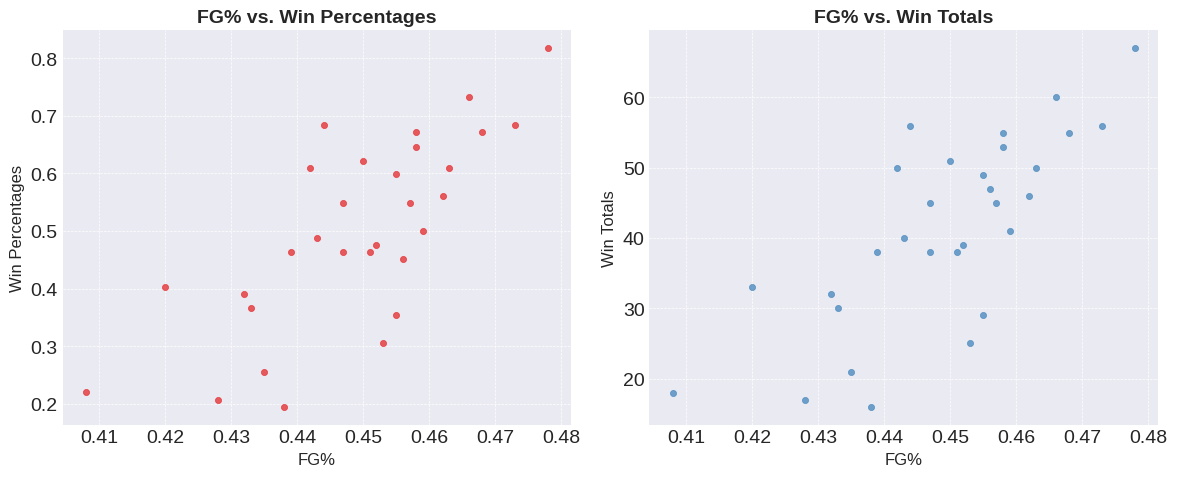

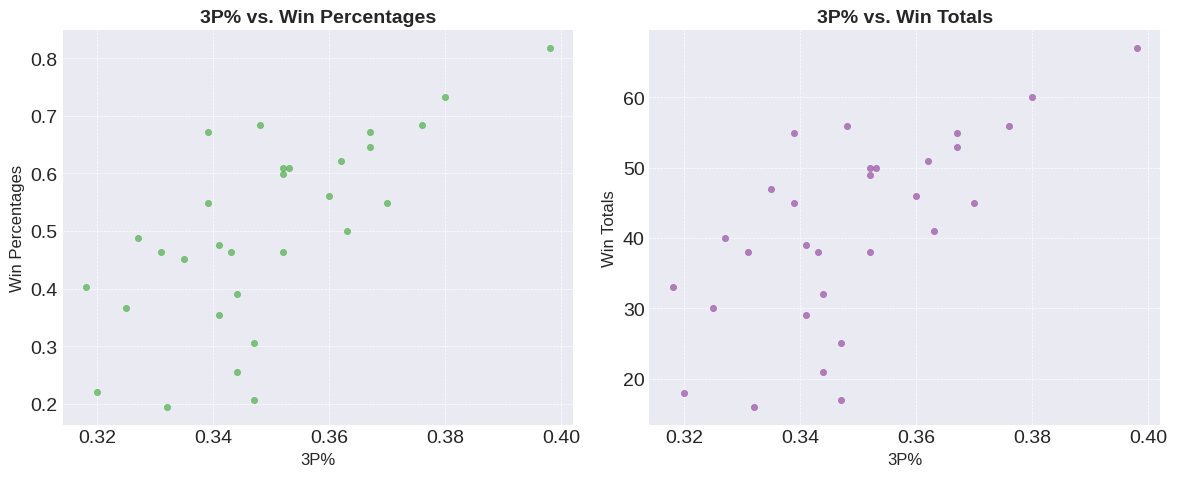

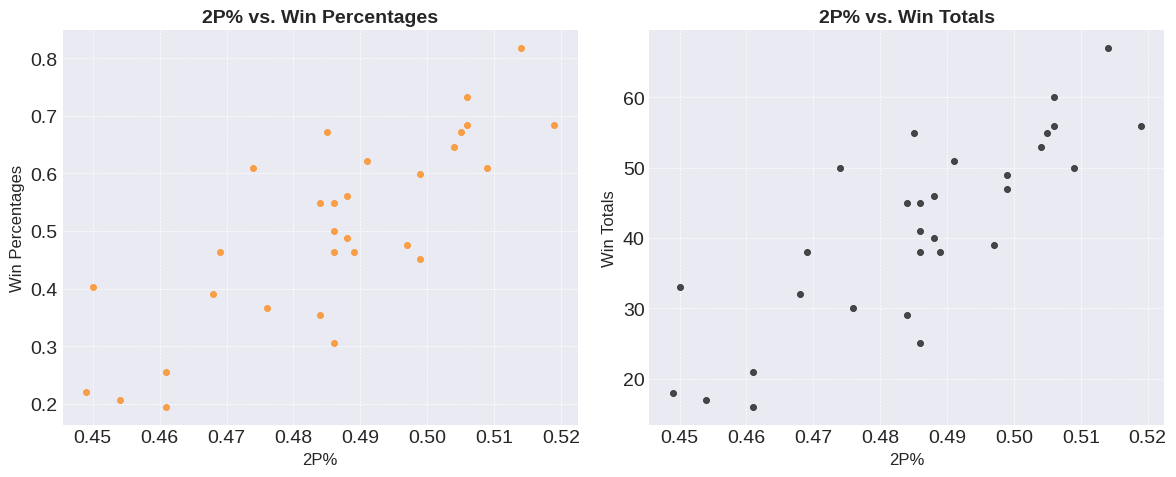

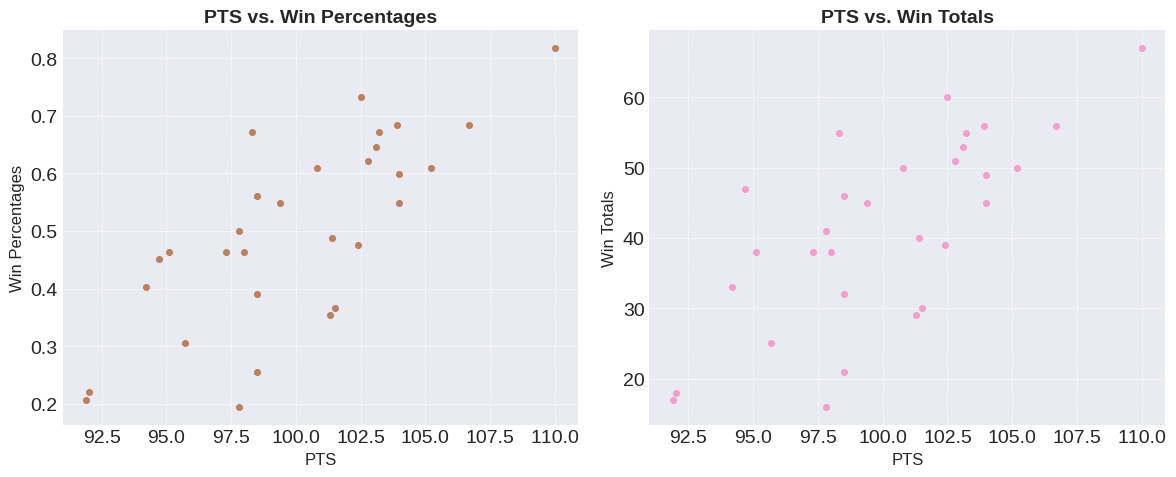

In [ ]:
import matplotlib.pyplot as plt

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a color palette
palette = plt.get_cmap('Set1')

# FG%
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(predictors_combined['FG%'], y, s=20, color=palette(0), alpha=0.7)
plt.title('FG% vs. Win Percentages', fontsize=14, fontweight='bold')
plt.xlabel('FG%', fontsize=12)
plt.ylabel('Win Percentages', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)
plt.scatter(predictors_combined['FG%'], y1, s=20, color=palette(1), alpha=0.7)
plt.title('FG% vs. Win Totals', fontsize=14, fontweight='bold')
plt.xlabel('FG%', fontsize=12)
plt.ylabel('Win Totals', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# 3P%
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(predictors_combined['3P%'], y, s=20, color=palette(2), alpha=0.7)
plt.title('3P% vs. Win Percentages', fontsize=14, fontweight='bold')
plt.xlabel('3P%', fontsize=12)
plt.ylabel('Win Percentages', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)
plt.scatter(predictors_combined['3P%'], y1, s=20, color=palette(3), alpha=0.7)
plt.title('3P% vs. Win Totals', fontsize=14, fontweight='bold')
plt.xlabel('3P%', fontsize=12)
plt.ylabel('Win Totals', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# 2P%
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(predictors_combined['2P%'], y, s=20, color=palette(4), alpha=0.7)
plt.title('2P% vs. Win Percentages', fontsize=14, fontweight='bold')
plt.xlabel('2P%', fontsize=12)
plt.ylabel('Win Percentages', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)
plt.scatter(predictors_combined['2P%'], y1, s=20, color='black', alpha=0.7)
plt.title('2P% vs. Win Totals', fontsize=14, fontweight='bold')
plt.xlabel('2P%', fontsize=12)
plt.ylabel('Win Totals', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# PTS
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(predictors_combined['PTS'], y, s=20, color=palette(6), alpha=0.7)
plt.title('PTS vs. Win Percentages', fontsize=14, fontweight='bold')
plt.xlabel('PTS', fontsize=12)
plt.ylabel('Win Percentages', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)
plt.scatter(predictors_combined['PTS'], y1, s=20, color=palette(7), alpha=0.7)
plt.title('PTS vs. Win Totals', fontsize=14, fontweight='bold')
plt.xlabel('PTS', fontsize=12)
plt.ylabel('Win Totals', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


Variable Groups:
*  Predictor Group A: FG,	FG%,	3P,	3P%,	2P%,	FT%,	ORB,	DRB,	AST,	TOV,	PF,	PTS, oppFG,	oppFG%,	opp3P,	opp3P%,	opp2P%,	oppFT,	oppAST,	oppBLK,	oppPTS
(predictors_combined in terms of data)
* Predictor Group B:
  FG%	3P	3P%	2P%	DRB	AST	PTS	oppFG%	opp3P%	opp2P% oppBLK	oppPTS
  (best_predictors_combined in terms of data)
* Predictor Group C: FG%, 3P%, 2P%, and PTS


In [ ]:
best_offensive_predictors_df = offensive_basketball_stats_df[['FG%','3P','3P%','2P%','DRB','AST','PTS']]
best_defensive_predictors = defensive_bball_stats_df[['FG%','3P%','2P%','BLK','PTS']]
best_defensive_predictors = best_defensive_predictors.rename(columns={'FG%':'oppFG%','3P%':'opp3P%','2P%':'opp2P%','BLK':'oppBLK','PTS':'oppPTS'})
best_predictors_combined = best_offensive_predictors_df.join(best_defensive_predictors, how='left')
best_predictors_combined.head(10)

FG%    3P    3P%    2P%   DRB   AST    PTS  oppFG%  \
Golden State Warriors   0.478  10.8  0.398  0.514  34.3  27.4  110.0   0.428   
Los Angeles Clippers    0.473  10.1  0.376  0.519  33.1  24.8  106.7   0.442   
Dallas Mavericks        0.463   8.9  0.352  0.509  31.8  22.5  105.2   0.450   
Oklahoma City Thunder   0.447   7.7  0.339  0.486  34.7  20.5  104.0   0.440   
Toronto Raptors         0.455   8.9  0.352  0.499  30.8  20.7  104.0   0.459   
Houston Rockets         0.444  11.4  0.348  0.506  32.0  22.2  103.9   0.443   
San Antonio Spurs       0.468   8.3  0.367  0.505  33.8  24.4  103.2   0.444   
Cleveland Cavaliers     0.458  10.1  0.367  0.504  31.9  22.1  103.1   0.456   
Portland Trail Blazers  0.450   9.8  0.362  0.491  35.1  21.9  102.8   0.439   
Atlanta Hawks           0.466  10.0  0.380  0.506  31.8  25.7  102.5   0.439   

                        opp3P%  opp2P%  oppBLK  oppPTS  
Golden State Warriors    0.337   0.458     3.6    99.9  
Los Angeles Clippers     0.349   0.481     3.0   100.1  
Dallas Mavericks         0.364   0.485     3.8   102.3  
Oklahoma City Thunder    0.343   0.479     4.6   101.8  
Toronto Raptors          0.346   0.501     5.0   100.9  
Houston Rockets          0.322   0.487     5.3   100.5  
San Antonio Spurs        0.360   0.468     4.4    97.0  
Cleveland Cavaliers      0.343   0.497     4.5    98.7  
Portland Trail Blazers   0.338   0.468     3.6    98.6  
Atlanta Hawks            0.341   0.483     4.9    97.1

In [ ]:
predictors_combined_corr1 = predictors_combined.join(win_df, how='left')
predictors_combined_corr = predictors_combined_corr1.corr()
predictors_combined_corr

FG       FG%        3P       3P%       2P%       FT%  \
FG               1.000000  0.745656  0.433045  0.618845  0.712815  0.359095   
FG%              0.745656  1.000000  0.280770  0.761580  0.885917  0.374021   
3P               0.433045  0.280770  1.000000  0.525873  0.595050 -0.101695   
3P%              0.618845  0.761580  0.525873  1.000000  0.637780  0.308743   
2P%              0.712815  0.885917  0.595050  0.637780  1.000000  0.178885   
FT%              0.359095  0.374021 -0.101695  0.308743  0.178885  1.000000   
ORB             -0.166630 -0.509621 -0.028422 -0.357288 -0.410972 -0.319497   
DRB              0.461310  0.202747  0.207722  0.270655  0.164754  0.190415   
AST              0.677966  0.587648  0.464802  0.720799  0.522139  0.189627   
TOV             -0.355870 -0.173897 -0.021140 -0.128549 -0.105006 -0.301355   
PF              -0.013032 -0.191200 -0.009129 -0.255856 -0.073226 -0.379105   
PTS              0.869403  0.669323  0.651066  0.599301  0.769121  0.300882   
oppFG            0.064559 -0.202995 -0.107907 -0.276698 -0.173252  0.165463   
oppFG%          -0.313257 -0.311287 -0.368967 -0.424979 -0.325693 -0.073481   
opp3P           -0.137623 -0.015457 -0.316990 -0.244116 -0.068405 -0.191283   
opp3P%          -0.312023 -0.221903 -0.519583 -0.306373 -0.380556 -0.062842   
opp2P%          -0.273349 -0.243304 -0.287988 -0.394704 -0.216267 -0.121458   
oppFT            0.102698 -0.157427  0.127505 -0.069539 -0.070706 -0.340843   
oppAST          -0.096712 -0.206014  0.044454 -0.191893 -0.123839 -0.303860   
oppBLK          -0.480673 -0.485576 -0.441081 -0.521198 -0.510999 -0.100060   
oppPTS           0.071349 -0.242556 -0.097826 -0.313365 -0.188559 -0.072125   
Win Percentage   0.681365  0.745090  0.613506  0.693932  0.809471  0.321853   
Total Wins       0.642934  0.755420  0.596201  0.673326  0.826112  0.312115   
Class(Playoffs)  0.571401  0.627650  0.419723  0.589186  0.633426  0.349640   

                      ORB       DRB       AST       TOV  ...     opp3P  \
FG              -0.166630  0.461310  0.677966 -0.355870  ... -0.137623   
FG%             -0.509621  0.202747  0.587648 -0.173897  ... -0.015457   
3P              -0.028422  0.207722  0.464802 -0.021140  ... -0.316990   
3P%             -0.357288  0.270655  0.720799 -0.128549  ... -0.244116   
2P%             -0.410972  0.164754  0.522139 -0.105006  ... -0.068405   
FT%             -0.319497  0.190415  0.189627 -0.301355  ... -0.191283   
ORB              1.000000  0.026506 -0.343568  0.238959  ... -0.207989   
DRB              0.026506  1.000000  0.270161 -0.255925  ... -0.440562   
AST             -0.343568  0.270161  1.000000 -0.114541  ... -0.124443   
TOV              0.238959 -0.255925 -0.114541  1.000000  ...  0.107687   
PF               0.280081 -0.112747 -0.098962  0.416823  ...  0.264222   
PTS             -0.044795  0.424274  0.587379 -0.247283  ... -0.171293   
oppFG            0.378512 -0.180076 -0.230107 -0.008834  ...  0.118725   
oppFG%           0.226564 -0.697284 -0.449086  0.002934  ...  0.353399   
opp3P           -0.207989 -0.440562 -0.124443  0.107687  ...  1.000000   
opp3P%          -0.132661 -0.420040 -0.350948 -0.132166  ...  0.514574   
opp2P%           0.206211 -0.716580 -0.381034  0.078175  ...  0.457010   
oppFT            0.186810 -0.000121  0.060608  0.241964  ...  0.181868   
oppAST           0.074816 -0.402397 -0.073704  0.018544  ...  0.598307   
oppBLK           0.366274 -0.216693 -0.379376  0.278927  ...  0.004284   
oppPTS           0.351090 -0.244090 -0.184960  0.129549  ...  0.403906   
Win Percentage  -0.325330  0.458128  0.618330 -0.260236  ... -0.350080   
Total Wins      -0.371005  0.415547  0.586705 -0.251475  ... -0.339999   
Class(Playoffs) -0.318205  0.208070  0.648296 -0.221700  ... -0.279052   

                   opp3P%    opp2P%     oppFT    oppAST    oppBLK    oppPTS  \
FG              -0.312023 -0.273349  0.102698 -0.096712 -0.480673  0.071349   
FG%             -0.221903 -0.243304 -0

<Axes: >

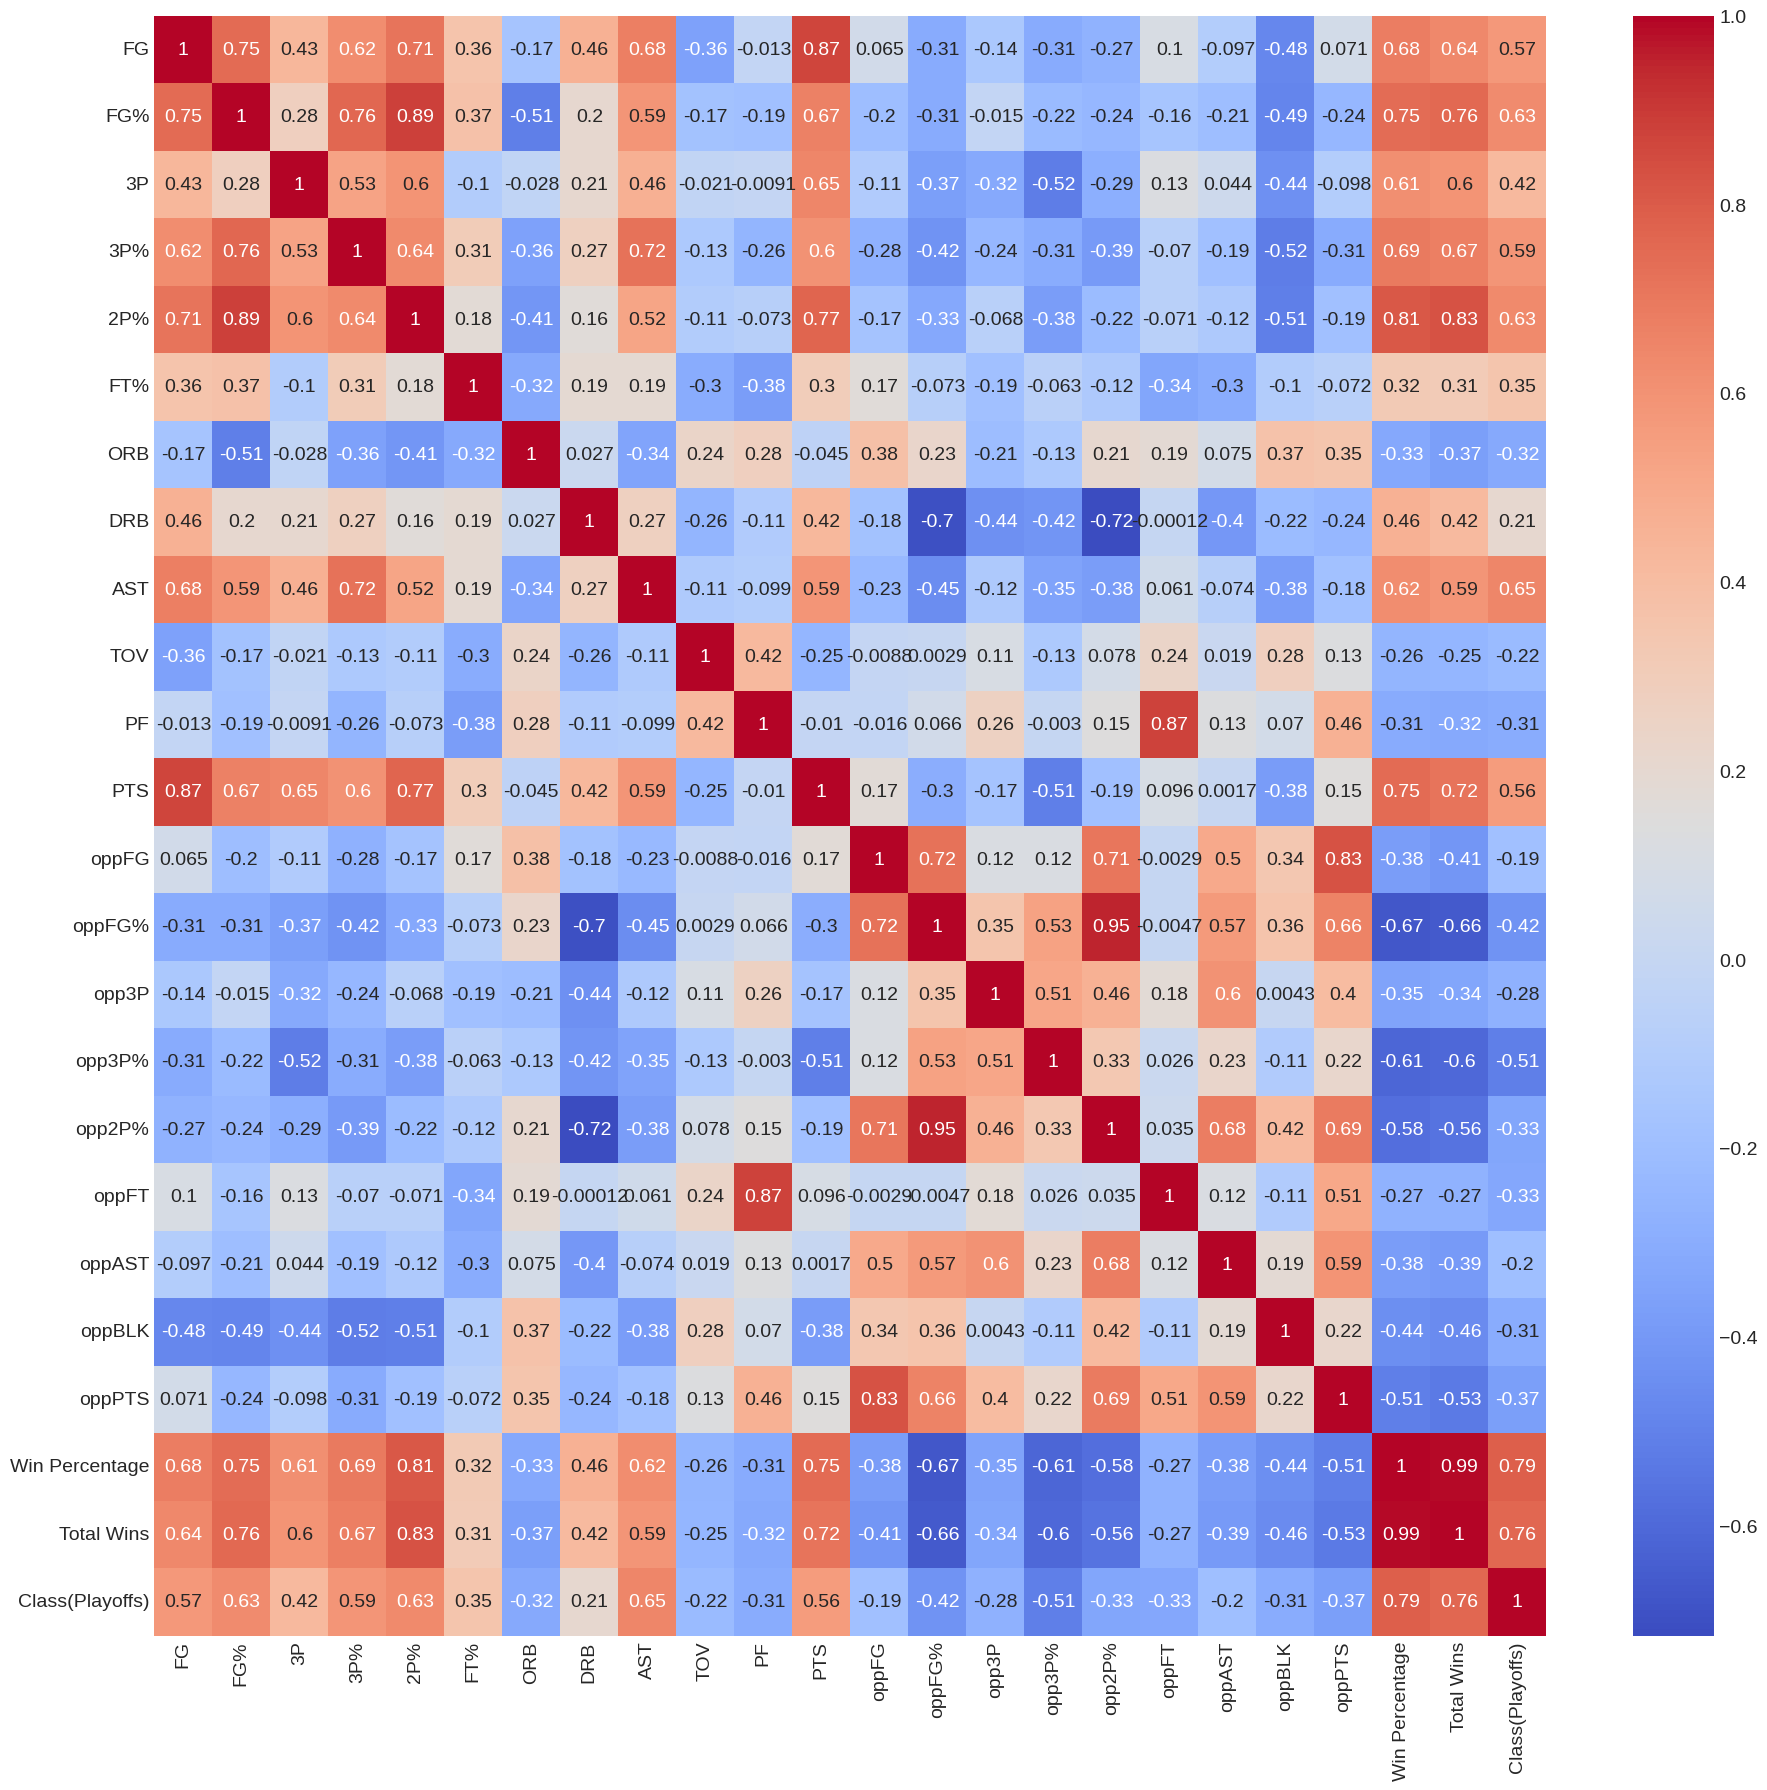

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=predictors_combined_corr,annot=True, cmap = 'coolwarm')

<Axes: >

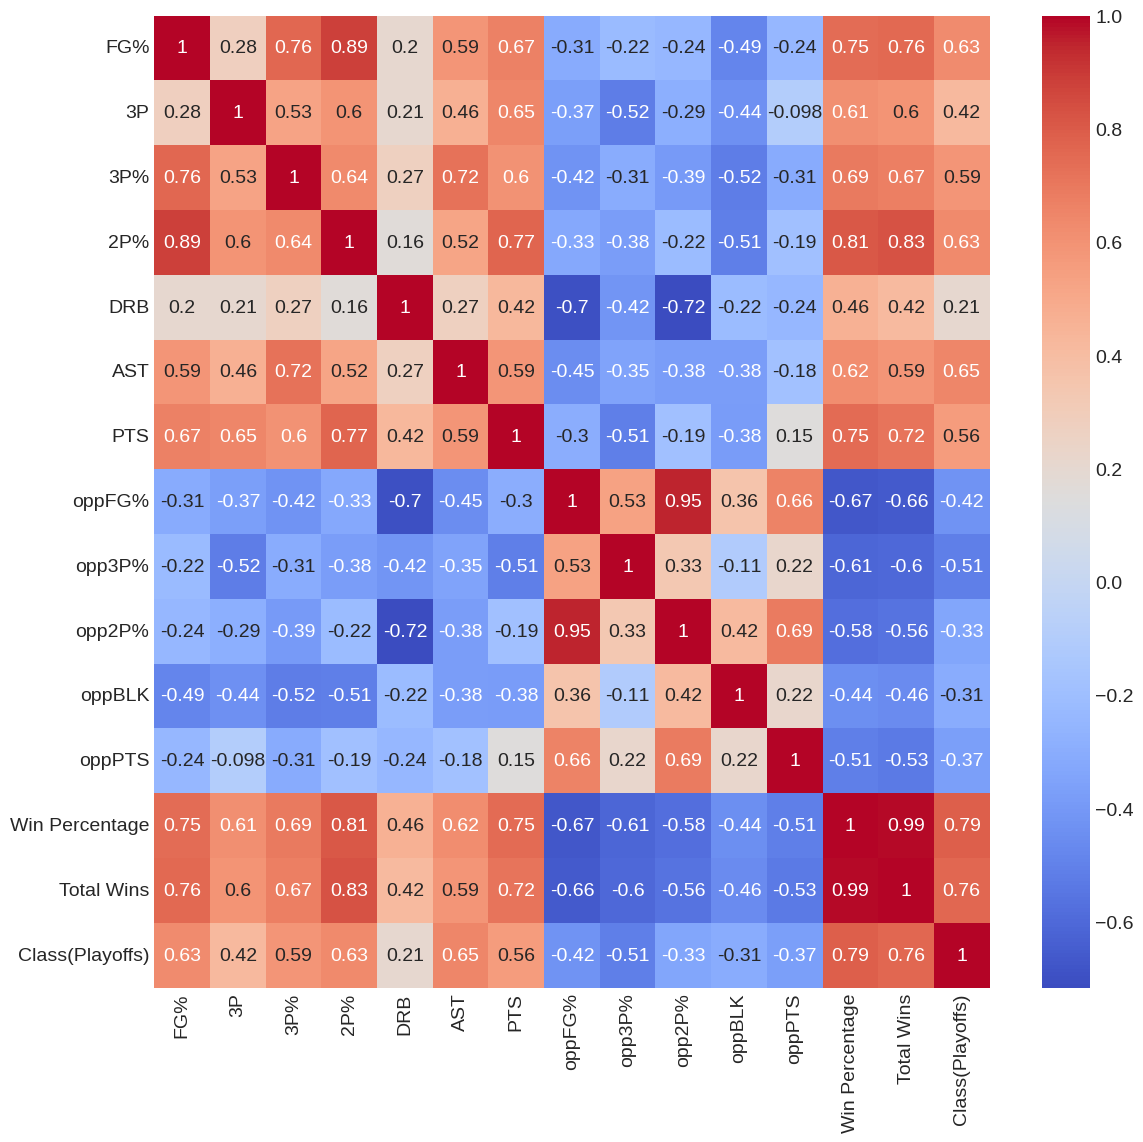

In [ ]:
best_predictors_combined1 = best_predictors_combined.join(win_df, how='left')
best_predictors_combined_corr = best_predictors_combined1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data=best_predictors_combined_corr,annot=True, cmap = 'coolwarm')

In [ ]:
best_predictors_combined.columns

Index(['FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'PTS', 'oppFG%', 'opp3P%',
       'opp2P%', 'oppBLK', 'oppPTS'],
      dtype='object')

In [ ]:
best_predictors_combined.shape

(30, 12)

# Least Squares Regression

In [ ]:
OLSReg = LinearRegres sion()
OLSReg.fit(predictors_combined,y1)
groupa_score = OLSReg.score(predictors_combined,y1)
print("Model score for all predictors:",groupa_score)
#print("Coefficient values for all predictors:",OLSReg.coef_)
a = pd.DataFrame({
    'coef scores': OLSReg.coef_[0]},
    index = predictors_combined.columns)
print(a)

OLSReg.fit(predictors_combined[['FG%', '3P%', '2P%', 'PTS']],y)
groupb_score = OLSReg.score(predictors_combined[['FG%', '3P%', '2P%', 'PTS']],y)
print("Model score for all predictors:",groupb_score)
#print("Coefficient values for predictor variables FG%, 3P%, 2P%, and PTS for total wins:",OLSReg.coef_)
b = pd.DataFrame({
    'coef scores': OLSReg.coef_[0]},
    index = ['FG%', '3P%', '2P%', 'PTS'])
print(b)
OLSReg.fit(best_predictors_combined,y)
groupc_score = OLSReg.score(best_predictors_combined,y)
print("Model score for all predictors:",groupc_score)
#print("Coefficient values for all best_predictors_combined variables:",OLSReg.coef_)
c = pd.DataFrame({
    'coef scores': OLSReg.coef_[0]},
    index = best_predictors_combined.columns)
print(c)

Model score for all predictors: 0.988061284969886
        coef scores
FG        -1.477680
FG%      613.073075
3P         3.822382
3P%     -173.000184
2P%     -123.160564
FT%       37.785360
ORB       -0.336970
DRB        0.551359
AST        0.309055
TOV       -1.175757
PF        -0.451712
PTS        0.696140
oppFG    -68.925026
oppFG%  1096.794026
opp3P    -24.743201
opp3P%  -624.521086
opp2P%  -745.945269
oppFT    -33.870824
oppAST    -1.798723
oppBLK     0.439122
oppPTS    32.585383
Model score for all predictors: 0.7335904498072787
     coef scores
FG%    -1.421367
3P%     2.703215
2P%     4.926230
PTS     0.008611
Model score for all predictors: 0.9712303928513581
        coef scores
FG%       -0.009649
3P        -0.004550
3P%       -0.206511
2P%        0.953469
DRB       -0.011923
AST        0.000004
PTS        0.029841
oppFG%    -2.375721
opp3P%    -0.696375
opp2P%     0.683387
oppBLK     0.002664
oppPTS    -0.030846


In [ ]:
#k fold cross validation and least squares model
def lsr(x_scaled, y):
  indices = x_scaled.index.to_numpy()
  k = 10
  folds = np.array_split(indices, k)
  errors_mae = np.array([])
  errors_mse = np.array([])
  scores_r2 = np.array([])
  regress = LinearRegression()
  scaler = StandardScaler()
  coefs = []

  for i in range(k):
    test = folds[i]
    train = np.concatenate(folds[:i]+ folds[i + 1:])
    X_train, y_train = x_scaled.loc[train], y.loc[train]
    X_test, y_test = x_scaled.loc[test], y.loc[test]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    regress.fit(X_train_scaled, y_train)
    coefs.append(regress.coef_[0])
    yfitted = regress.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, yfitted)
    mse = mean_squared_error(y_test, yfitted)
    r2 = r2_score(y_test, yfitted)
    errors_mae = np.append(errors_mae,mae)
    errors_mse = np.append(errors_mse,mse)
    scores_r2 = np.append(scores_r2, r2)
  avg_mae = np.mean(errors_mae)
  avg_mse = np.mean(errors_mse)
  avg_r2 = np.mean(scores_r2)
  coefs = np.array(coefs)
  avg_coefs = np.mean(coefs, axis = 0)
  return avg_mae, avg_mse, avg_r2, avg_coefs

#correlations
mae_df1 = lsr(predictors_combined[predictors_combined.columns],y1)[0]
mse_df1 = lsr(predictors_combined[predictors_combined.columns],y1)[1]
r2_df1 = lsr(predictors_combined[predictors_combined.columns],y1)[2]
coefs_df1 = lsr(predictors_combined[predictors_combined.columns],y1)[3]
mae_df2 = lsr(predictors_combined[['FG%', '3P%', '2P%', 'PTS']],y1)[0]
mse_df2 = lsr(predictors_combined[['FG%', '3P%', '2P%', 'PTS']],y1)[1]
r2_df2 = lsr(predictors_combined[['FG%', '3P%', '2P%', 'PTS']],y1)[2]
coefs_df2 = lsr(predictors_combined[['FG%', '3P%', '2P%', 'PTS']],y1)[3]
mae_df3 = lsr(best_predictors_combined[best_predictors_combined.columns],y1)[0]
mse_df3 = lsr(best_predictors_combined[best_predictors_combined.columns],y1)[1]
r2_df3 = lsr(best_predictors_combined[best_predictors_combined.columns],y1)[2]
coefs_df3 = lsr(best_predictors_combined[best_predictors_combined.columns],y1)[3]
print("Coefs of Group A variables:",coefs_df1)
print("Coefs of Group B variables:",coefs_df3)
print("Coefs of Group C variables:",coefs_df2)
print("")
'''
print("MAE of all predictors_combined variables for total wins:",mae_df1)
print("MSE of all predictors_combined variables for total wins:",mse_df1)
print("MAE of predictor variables FG%, 3P%, 2P%, and PTS for total wins:",mae_df2)
print("MSE of predictor variables FG%, 3P%, 2P%, and PTS for total wins:",mse_df2)
print("MAE of all best_predictors_combined variables for total wins:",mae_df3)
print("MSE of all best_predictors_combined variables for total wins:",mse_df3)
print("-----------------------------------------------")
#normalized
print("MAE of all predictors_combined variables for total wins:",lsr(predictors_combined[predictors_combined.columns],y1**2)[0])
print("MSE of all predictors_combined variables for total wins:",lsr(predictors_combined[predictors_combined.columns],y1**2)[1])
print("MAE of predictor variables FG%, 3P%, 2P%, and PTS for total wins:",lsr(predictors_combined[['FG%', '3P%', '2P%', 'PTS']],y1**2)[0])
print("MSE of predictor variables FG%, 3P%, 2P%, and PTS for total wins:",lsr(predictors_combined[['FG%', '3P%', '2P%', 'PTS']],y1**2)[1])
print("MAE of all best_predictors_combined variables for total wins:",lsr(best_predictors_combined[best_predictors_combined.columns],y1**2)[0])
print("MSE of all best_predictors_combined variables for total wins:",lsr(best_predictors_combined[best_predictors_combined.columns],y1**2)[1])
'''
#comparing the two, we see that the original response variables were already normal,
#the left looking skew likely due to a small set of datapoints

Coefs of Group A variables: [-2.72887175e+00  1.30660158e+01  8.05957239e+00 -4.51873988e+00
 -4.78126666e+00  1.16957453e+00 -5.57936914e-04  1.25375264e+00
  7.84166696e-01 -1.69351584e+00 -8.51795567e-01  1.73481314e+00
 -8.92093681e+01  1.67172039e+01 -1.72969850e+01 -8.86364131e+00
 -1.44700804e+01 -5.05950897e+01 -2.59020582e+00  3.09639893e-01
  1.04931602e+02]
Coefs of Group B variables: [ 3.32440434  0.49273305 -2.09022584  0.03786248 -1.76383442 -0.38934703
  8.51670707 -1.89269661 -1.7547541   0.65208892 -0.63224559 -7.24208805]
Coefs of Group C variables: [-1.654228    3.53823116  8.86831926  1.60808394]



'\nprint("MAE of all predictors_combined variables for total wins:",mae_df1)\nprint("MSE of all predictors_combined variables for total wins:",mse_df1)\nprint("MAE of predictor variables FG%, 3P%, 2P%, and PTS for total wins:",mae_df2)\nprint("MSE of predictor variables FG%, 3P%, 2P%, and PTS for total wins:",mse_df2)\nprint("MAE of all best_predictors_combined variables for total wins:",mae_df3)\nprint("MSE of all best_predictors_combined variables for total wins:",mse_df3)\nprint("-----------------------------------------------")\n#normalized\nprint("MAE of all predictors_combined variables for total wins:",lsr(predictors_combined[predictors_combined.columns],y1**2)[0])\nprint("MSE of all predictors_combined variables for total wins:",lsr(predictors_combined[predictors_combined.columns],y1**2)[1])\nprint("MAE of predictor variables FG%, 3P%, 2P%, and PTS for total wins:",lsr(predictors_combined[[\'FG%\', \'3P%\', \'2P%\', \'PTS\']],y1**2)[0])\nprint("MSE of predictor variables FG%, 3

In [ ]:
a = pd.DataFrame({
    'coef scores': coefs_df1},
    index = predictors_combined.columns)
print(a.sort_values(by=['coef scores']))
b = pd.DataFrame({
    'coef scores': coefs_df2},
    index = ['FG%', '3P%', '2P%', 'PTS'])
print(b.sort_values(by=['coef scores']))
c = pd.DataFrame({
    'coef scores': coefs_df3},
    index = best_predictors_combined.columns)
print(c.sort_values(by=['coef scores']))

        coef scores
oppFG    -89.209368
oppFT    -50.595090
opp3P    -17.296985
opp2P%   -14.470080
opp3P%    -8.863641
2P%       -4.781267
3P%       -4.518740
FG        -2.728872
oppAST    -2.590206
TOV       -1.693516
PF        -0.851796
ORB       -0.000558
oppBLK     0.309640
AST        0.784167
FT%        1.169575
DRB        1.253753
PTS        1.734813
3P         8.059572
FG%       13.066016
oppFG%    16.717204
oppPTS   104.931602
     coef scores
FG%    -1.654228
PTS     1.608084
3P%     3.538231
2P%     8.868319
        coef scores
oppPTS    -7.242088
3P%       -2.090226
oppFG%    -1.892697
DRB       -1.763834
opp3P%    -1.754754
oppBLK    -0.632246
AST       -0.389347
2P%        0.037862
3P         0.492733
opp2P%     0.652089
FG%        3.324404
PTS        8.516707


In [ ]:
test_set = best_predictors_combined.columns.to_list()
#test_set = test_set.remove('2P%')
del test_set[3]
print(test_set)

['FG%', '3P', '3P%', 'DRB', 'AST', 'PTS', 'oppFG%', 'opp3P%', 'opp2P%', 'oppBLK', 'oppPTS']


In [ ]:
#test
mae_df4 = lsr(best_predictors_combined[test_set],y1)[0]
mse_df4 = lsr(best_predictors_combined[test_set],y1)[1]
r2_df4 = lsr(best_predictors_combined[test_set],y1)[2]

In [ ]:
#print out as df/table
lsr_results = pd.DataFrame(
    {'Group A':[mae_df1,mse_df1,r2_df1],
     'Group B':[mae_df3,mse_df3,r2_df3],
     'Group C':[mae_df2,mse_df2,r2_df2],
     'Adjusted B': [mae_df4,mse_df4,r2_df4]},
     index = ['MAE','MSE','R-Squared']
)
lsr_results

Group A    Group B    Group C  Adjusted B
MAE         5.015654   3.805095   6.014619    3.628453
MSE        39.305080  20.279228  66.249640   18.593844
R-Squared  -1.546865   0.639349  -0.128504    0.686748

In [ ]:
#apply CV to combinations of testable attributes for team

testable_attributes = ('FG','FG%','3P','3P%','2P%','FT%','ORB','DRB','AST','TOV','PF','PTS')
mse_df = pd.DataFrame(columns=["attr_list", "measure", "mse"])

for i in range(1, 4096):
  testing_attributes = []
  for j in range(12):
    if (i % 2**(j+1)) >= (2**j):
      testing_attributes.append(testable_attributes[j])
  testing_attributes.sort()
  win50mse = lsr(predictors_combined[testing_attributes], win50)
  top16mse = lsr(predictors_combined[testing_attributes], top16)
  mse_df.loc[i*2] = [tuple(testing_attributes), ">50%", win50mse[1]]
  mse_df.loc[i*2+1] = [tuple(testing_attributes), "playoffs%", top16mse[1]]

mse_df.sort_values("mse")

NameError: name 'win50' is not defined

In [ ]:
#calculate differences in accuracy

mse_diffs = {
    'FG': [], 'FG%': [], '3P': [], '3P%': [], '2P%': [], 'FT%': [], 'ORB': [], 'DRB': [], 'AST': [], 'TOV': [], 'PF': [], 'PTS': []
}
for i in range(2, 8192, 2):
  testing_attributes = []
  for j in range(12):
    if ((i/2) % 2**(j+1)) >= (2**j):
      testing_attributes.append(testable_attributes[j])
  testing_attributes.sort()
  assert tuple(testing_attributes) == mse_df["attr_list"].loc[i]
  for j in range(1, 13):
    if testable_attributes[j-1] not in testing_attributes:
      continue
    if (i-(2**j)) % 8192 <= 1:
      continue
    if (i+1-(2**j)) % 8192 <= 1:
      continue
    foo = testing_attributes.copy()
    foo.remove(testable_attributes[j-1])
    assert tuple(foo) == mse_df["attr_list"].loc[(i-(2**j)) % 8192]
    assert tuple(foo) == mse_df["attr_list"].loc[(i+1-(2**j)) % 8192]
    mse_diffs[testable_attributes[j-1]].append(mse_df["mse"].loc[(i-(2**j)) % 8192] - mse_df["mse"].loc[i])
    mse_diffs[testable_attributes[j-1]].append(mse_df["mse"].loc[(i+1-(2**j)) % 8192] - mse_df["mse"].loc[i+1])

In [ ]:
#take mean of difference by attribute

mse_diffs_avg = {}
for i in mse_diffs:
  mse_diffs_avg[i] = sum(mse_diffs[i]) / len(mse_diffs[i])
mse_diffs_avg

# LASSO + RIDGE

In [ ]:
scaler = StandardScaler()
x_var = scaler.fit_transform(best_predictors_combined1[['FG%', '3P',
          '3P%', '2P%', 'DRB', 'AST', 'PTS', 'oppFG%', 'opp3P%',
       'opp2P%', 'oppBLK', 'oppPTS']])
y_var = np.log(best_predictors_combined1['Total Wins'])

alphas = np.logspace(-10, 10, 100)

lasso = LassoCV(cv = 15, alphas = alphas, max_iter = 100000)
lasso.fit(x_var, y_var)
print('Intercept:', round(lasso.intercept_, 11))
print('FG:', round(lasso.coef_[0], 11))
print('3P:', round(lasso.coef_[1], 11))
print('3P%:', round(lasso.coef_[2], 11))
print('2P%:', round(lasso.coef_[3], 11))
print('DRB:', round(lasso.coef_[4], 11))
print('AST:', round(lasso.coef_[5], 11))
print('PTS:', round(lasso.coef_[6], 11))
print('oppFG%:', round(lasso.coef_[7], 11))
print('opp3P%:', round(lasso.coef_[8], 11))
print('opp2P%:', round(lasso.coef_[9], 11))
print('oppBLK:', round(lasso.coef_[10], 11))
print('oppPTS:', round(lasso.coef_[11], 11))
print('LASSO score:', round(lasso.score(x_var, y_var), 11))

Intercept: 3.65811950585
FG: 0.05922799598
3P: -0.00645127245
3P%: -0.06073499099
2P%: 0.0880114332
DRB: -0.0
AST: -0.03098232845
PTS: 0.1988647878
oppFG%: -0.02323776502
opp3P%: -0.06163262779
opp2P%: -0.0
oppBLK: -0.00332878177
oppPTS: -0.20489495
LASSO score: 0.97354608213


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.485e-02, tolerance: 4.311e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.481e-02, tolerance: 4.311e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.475e-02, tolerance: 4.311e

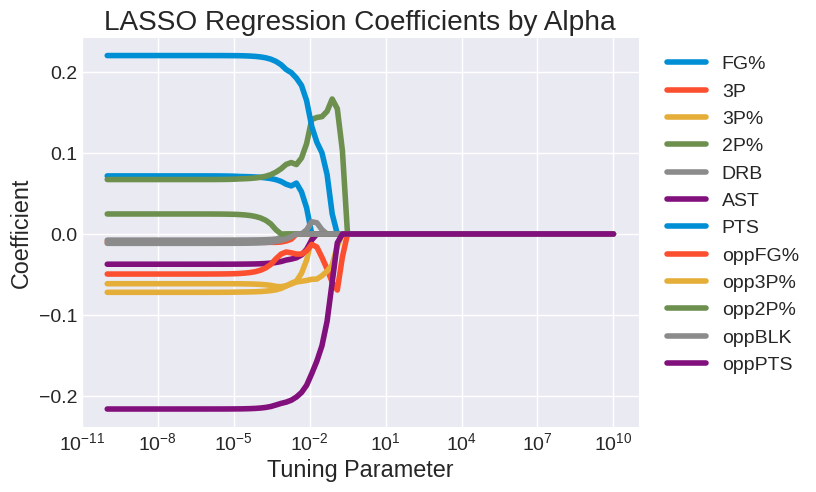

<Figure size 3000x3000 with 0 Axes>

In [ ]:
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_var, y_var)
    coefs.append(lasso.coef_)

plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Tuning Parameter')
plt.ylabel('Coefficient')
plt.title('LASSO Regression Coefficients by Alpha')
plt.legend(['FG%', '3P',
          '3P%', '2P%', 'DRB', 'AST', 'PTS', 'oppFG%', 'opp3P%',
       'opp2P%', 'oppBLK', 'oppPTS'], loc='upper left', bbox_to_anchor=(1.02, 1))
plt.figure(figsize = (30, 30))
plt.show()

In [ ]:
lasso_cv = LassoCV(cv=15, alphas=alphas)
lasso_cv.fit(x_var, y_var)
optimal_alpha = lasso_cv.alpha_

# Fit LASSO regression with optimal alpha
lasso = Lasso(alpha=optimal_alpha)
lasso.fit(x_var, y_var)

# Make predictions
lasso_pred = lasso.predict(x_var)

# Calculate MSE and MAE for LASSO
lasso_mse = mean_squared_error(y_var, lasso_pred)
lasso_mae = mean_absolute_error(y_var, lasso_pred)

print("LASSO Regression:")
print("Optimal Alpha:", optimal_alpha)
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006511204574118634, tolerance: 0.0004108821160687524
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007195893523719854, tolerance: 0.0004108821160687524
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007373358193761004, tolerance: 0.0004108821160687524
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descen

LASSO Regression:
Optimal Alpha: 0.001873817422860383
MSE: 0.0038015989413865466
MAE: 0.0514161966715341


In [ ]:
scaler = StandardScaler()
x_var = scaler.fit_transform(best_predictors_combined1[['FG%', '3P',
          '3P%', '2P%', 'DRB', 'AST', 'PTS', 'oppFG%', 'opp3P%',
       'opp2P%', 'oppBLK', 'oppPTS']])
y_var = np.log(best_predictors_combined1['Total Wins'])

alphas = np.logspace(-10, 10, 100)

ridge = RidgeCV(cv = 15, alphas = alphas)
ridge.fit(x_var, y_var)
print('Intercept:', round(ridge.intercept_, 11))
print('FG:', round(ridge.coef_[0], 11))
print('3P:', round(ridge.coef_[1], 11))
print('3P%:', round(ridge.coef_[2], 11))
print('2P%:', round(ridge.coef_[3], 11))
print('DRB:', round(ridge.coef_[4], 11))
print('AST:', round(ridge.coef_[5], 11))
print('PTS:', round(ridge.coef_[6], 11))
print('oppFG%:', round(ridge.coef_[7], 11))
print('opp3P%:', round(ridge.coef_[8], 11))
print('opp2P%:', round(ridge.coef_[9], 11))
print('oppBLK:', round(ridge.coef_[10], 11))
print('oppPTS:', round(ridge.coef_[11], 11))
print('Ridge score:', round(ridge.score(x_var, y_var), 11))

Intercept: 3.65811950585
FG: 0.06815257186
3P: -0.01109399743
3P%: -0.06963182102
2P%: 0.07231274931
DRB: -0.00690134834
AST: -0.03671625928
PTS: 0.21599392787
oppFG%: -0.04642472011
opp3P%: -0.06244600999
opp2P%: 0.02095388361
oppBLK: -0.01132513221
oppPTS: -0.21300258527
Ridge score: 0.97450859606


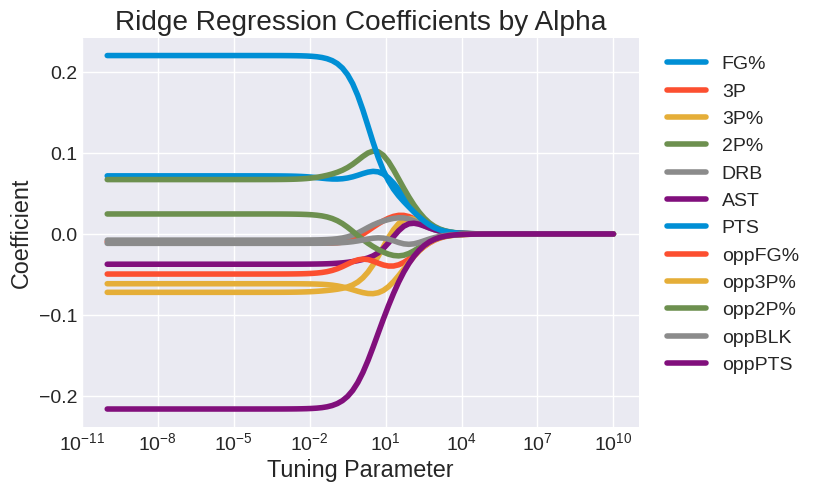

<Figure size 3000x3000 with 0 Axes>

In [ ]:
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_var, y_var)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Tuning Parameter')
plt.ylabel('Coefficient')
plt.title('Ridge Regression Coefficients by Alpha')
plt.legend(['FG%', '3P',
          '3P%', '2P%', 'DRB', 'AST', 'PTS', 'oppFG%', 'opp3P%',
       'opp2P%', 'oppBLK', 'oppPTS'], loc='upper left', bbox_to_anchor=(1.02, 1))
plt.figure(figsize = (30, 30))
plt.show()

In [ ]:
ridge_cv = RidgeCV(cv=15, alphas=alphas)
ridge_cv.fit(x_var, y_var)
optimal_alpha = ridge_cv.alpha_

ridge = Ridge(alpha=optimal_alpha)
ridge.fit(x_var, y_var)

# Make predictions
ridge_pred = ridge.predict(x_var)

# Calculate MSE and MAE for Ridge
ridge_mse = mean_squared_error(y_var, ridge_pred)
ridge_mae = mean_absolute_error(y_var, ridge_pred)

print("Ridge Regression:")
print("Optimal Alpha:", optimal_alpha)
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)

Ridge Regression:
Optimal Alpha: 0.04862601580065353
MSE: 0.003663279469730069
MAE: 0.05119210661800532


# Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#k-fold cross validation

def logreg(xs, y):
  tests = np.array_split(xs.index.to_numpy(), 5)
  errors = np.array([])
  model = LogisticRegression()
  standard_scaler = StandardScaler()
  for i in range(5):
    train_set = np.concatenate(tests[:i] + tests[i + 1:])
    train = [xs.loc[train_set], y.loc[train_set]]
    test = [xs.loc[tests[i]], y.loc[tests[i]]]
    model.fit(standard_scaler.fit_transform(train[0]), train[1])
    prediction = model.predict(standard_scaler.transform(test[0]))
    errors = np.append(errors, mean_absolute_error(test[1], prediction))
  return np.mean(errors)

#datasets for over 50% wins and making it to playoffs

win50 = np.round(win_df[['Win Percentage']])
top16 = win_df[['Win Percentage']].sort_values("Win Percentage", ascending=False)
top16.loc[:16, "Win Percentage"] = 1
top16.loc[16:, "Win Percentage"] = 0

In [ ]:
#apply CV to combinations of testable attributes for team
#"accuracy" is a misnomer - it's actually error, or 1-accuracy, but the math works regardless

testable_attributes = ('FG','FG%','3P','3P%','2P%','FT%','ORB','DRB','AST','TOV','PF','PTS')
accuracy_df = pd.DataFrame(columns=["attr_list", "measure", "accuracy"])

for i in range(1, 4096):
  testing_attributes = []
  for j in range(12):
    if (i % 2**(j+1)) >= (2**j):
      testing_attributes.append(testable_attributes[j])
  testing_attributes.sort()
  win50accuracy = logreg(predictors_combined[testing_attributes], win50)
  top16accuracy = logreg(predictors_combined[testing_attributes], top16)
  accuracy_df.loc[i*2] = [tuple(testing_attributes), ">50%", win50accuracy]
  accuracy_df.loc[i*2+1] = [tuple(testing_attributes), "playoffs%", top16accuracy]

accuracy_df.sort_values("accuracy")

attr_list    measure  accuracy
1653  (2P%, 3P%, AST, FG%, FT%, TOV)  playoffs%  0.066667
737             (2P%, AST, FT%, ORB)  playoffs%  0.066667
5649            (3P%, AST, PTS, TOV)  playoffs%  0.066667
625             (2P%, 3P%, AST, FT%)  playoffs%  0.066667
1585            (2P%, 3P%, AST, TOV)  playoffs%  0.066667
...                              ...        ...       ...
129                           (ORB,)  playoffs%  0.733333
2177                       (ORB, PF)  playoffs%  0.800000
3073                       (PF, TOV)  playoffs%  0.833333
2049                           (PF,)  playoffs%  0.833333
3201                  (ORB, PF, TOV)  playoffs%  0.866667

[8190 rows x 3 columns]

In [ ]:
#calculate differences in accuracy

accuracy_diffs = {
    'FG': [], 'FG%': [], '3P': [], '3P%': [], '2P%': [], 'FT%': [], 'ORB': [], 'DRB': [], 'AST': [], 'TOV': [], 'PF': [], 'PTS': []
}
for i in range(2, 8192, 2):
  testing_attributes = []
  for j in range(12):
    if ((i/2) % 2**(j+1)) >= (2**j):
      testing_attributes.append(testable_attributes[j])
  testing_attributes.sort()
  assert tuple(testing_attributes) == accuracy_df["attr_list"].loc[i]
  for j in range(1, 13):
    if testable_attributes[j-1] not in testing_attributes:
      continue
    if (i-(2**j)) % 8192 <= 1:
      continue
    if (i+1-(2**j)) % 8192 <= 1:
      continue
    foo = testing_attributes.copy()
    foo.remove(testable_attributes[j-1])
    assert tuple(foo) == accuracy_df["attr_list"].loc[(i-(2**j)) % 8192]
    assert tuple(foo) == accuracy_df["attr_list"].loc[(i+1-(2**j)) % 8192]
    accuracy_diffs[testable_attributes[j-1]].append(accuracy_df["accuracy"].loc[(i-(2**j)) % 8192] - accuracy_df["accuracy"].loc[i])
    accuracy_diffs[testable_attributes[j-1]].append(accuracy_df["accuracy"].loc[(i+1-(2**j)) % 8192] - accuracy_df["accuracy"].loc[i+1])

In [ ]:
#take mean of difference by attribute

accuracy_diffs_avg = {}
for i in accuracy_diffs:
  accuracy_diffs_avg[i] = sum(accuracy_diffs[i]) / len(accuracy_diffs[i])
accuracy_diffs_avg

{'FG': 0.011048689138576814,
 'FG%': 0.033007653476631926,
 '3P': -0.020696954893339687,
 '3P%': 0.03418010096075501,
 '2P%': 0.015412799218368408,
 'FT%': 0.027984041687021247,
 'ORB': -0.0005780817456440318,
 'DRB': 0.006741573033707874,
 'AST': 0.03014167073766472,
 'TOV': 0.0013759973945611469,
 'PF': -0.019809477283829906,
 'PTS': 0.03442436085328073}

In [ ]:
#take only attributes which improve accuracy

positive_attributes = [i for i in accuracy_diffs_avg if accuracy_diffs_avg[i] > 0]
positive_attributes

['FG', 'FG%', '3P%', '2P%', 'FT%', 'DRB', 'AST', 'TOV', 'PTS']

In [ ]:
#repeat with opponent stats

testable_attributes_opp = ('oppFG', 'oppFG%', 'opp3P', 'opp3P%', 'opp2P%', 'oppFT', 'oppAST', 'oppBLK', 'oppPTS')
accuracy_df_opp = pd.DataFrame(columns=["attr_list", "measure", "accuracy"])

for i in range(1, 512):
  testing_attributes = list(positive_attributes)
  for j in range(9):
    if (i % 2**(j+1)) >= (2**j):
      testing_attributes.append(testable_attributes_opp[j])
  testing_attributes.sort()
  win50accuracy = logreg(predictors_combined[testing_attributes], win50)
  top16accuracy = logreg(predictors_combined[testing_attributes], top16)
  accuracy_df_opp.loc[i*2] = [tuple(testing_attributes), ">50%", win50accuracy]
  accuracy_df_opp.loc[i*2+1] = [tuple(testing_attributes), "playoffs%", top16accuracy]

accuracy_df_opp.sort_values("accuracy")

attr_list    measure  accuracy
337   (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...  playoffs%  0.066667
81    (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...  playoffs%  0.066667
1023  (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...  playoffs%  0.100000
849   (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...  playoffs%  0.100000
851   (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...  playoffs%  0.100000
...                                                 ...        ...       ...
248   (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...       >50%  0.233333
250   (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...       >50%  0.233333
252   (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...       >50%  0.233333
128   (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...       >50%  0.233333
2     (2P%, 3P%, AST, DRB, FG, FG%, FT%, PTS, TOV, o...       >50%  0.233333

[1022 rows x 3 columns]

In [ ]:
accuracy_diffs_opp = {
    'oppFG': [], 'oppFG%': [], 'opp3P': [], 'opp3P%': [], 'opp2P%': [], 'oppFT': [], 'oppAST': [], 'oppBLK': [], 'oppPTS': []
}
for i in range(2, 1024, 2):
  testing_attributes = list(positive_attributes)
  for j in range(9):
    if ((i/2) % 2**(j+1)) >= (2**j):
      testing_attributes.append(testable_attributes_opp[j])
  testing_attributes.sort()
  assert tuple(testing_attributes) == accuracy_df_opp["attr_list"].loc[i]
  for j in range(1, 10):
    if testable_attributes_opp[j-1] not in testing_attributes:
      continue
    if (i-(2**j)) % 1024 <= 1:
      continue
    if (i+1-(2**j)) % 1024 <= 1:
      continue
    foo = testing_attributes.copy()
    foo.remove(testable_attributes_opp[j-1])
    assert tuple(foo) == accuracy_df_opp["attr_list"].loc[(i-(2**j)) % 1024]
    assert tuple(foo) == accuracy_df_opp["attr_list"].loc[(i+1-(2**j)) % 1024]
    accuracy_diffs_opp[testable_attributes_opp[j-1]].append(accuracy_df_opp["accuracy"].loc[(i-(2**j)) % 1024] - accuracy_df_opp["accuracy"].loc[i])
    accuracy_diffs_opp[testable_attributes_opp[j-1]].append(accuracy_df_opp["accuracy"].loc[(i+1-(2**j)) % 1024] - accuracy_df_opp["accuracy"].loc[i+1])
accuracy_diffs_avg_opp = {}
for i in accuracy_diffs_opp:
  accuracy_diffs_avg_opp[i] = sum(accuracy_diffs_opp[i]) / len(accuracy_diffs_opp[i])
accuracy_diffs_avg_opp

{'oppFG': 0.002026143790849672,
 'oppFG%': 0.0001307189542483667,
 'opp3P': -0.0062745098039215606,
 'opp3P%': 0.01692810457516336,
 'opp2P%': -0.005163398692810453,
 'oppFT': 0.0043790849673202665,
 'oppAST': -0.007516339869281033,
 'oppBLK': -0.0018954248366013062,
 'oppPTS': 0.0013071895424836596}

In [ ]:
positive_attributes_opp = [i for i in accuracy_diffs_avg_opp if accuracy_diffs_avg_opp[i] > 0]
positive_attributes_opp

['oppFG', 'oppFG%', 'opp3P%', 'oppFT', 'oppPTS']

In [ ]:
#combine lists
positive_attributes_all = positive_attributes + positive_attributes_opp
positive_attributes_all

['FG',
 'FG%',
 '3P%',
 '2P%',
 'FT%',
 'DRB',
 'AST',
 'TOV',
 'PTS',
 'oppFG',
 'oppFG%',
 'opp3P%',
 'oppFT',
 'oppPTS']

In [ ]:
#final results

print("Group A >50%:", logreg(predictors_combined[['FG', 'FG%', '3P', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'AST', 'TOV', 'PF', 'PTS', 'oppFG', 'oppFG%', 'opp3P', 'opp3P%', 'opp2P%', 'oppFT', 'oppAST', 'oppBLK', 'oppPTS']], win50))
print("Group A playoffs:", logreg(predictors_combined[['FG', 'FG%', '3P', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'AST', 'TOV', 'PF', 'PTS', 'oppFG', 'oppFG%', 'opp3P', 'opp3P%', 'opp2P%', 'oppFT', 'oppAST', 'oppBLK', 'oppPTS']], top16))
print("Group B >50%:", logreg(predictors_combined[['FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'PTS', 'oppFG%', 'opp3P%', 'opp2P%', 'oppBLK', 'oppPTS']], win50))
print("Group B playoffs:", logreg(predictors_combined[['FG%', '3P', '3P%', '2P%', 'DRB', 'AST', 'PTS', 'oppFG%', 'opp3P%', 'opp2P%', 'oppBLK', 'oppPTS']], top16))
print("Group C >50%:", logreg(predictors_combined[['FG%', '3P', '3P%', '2P%', 'PTS']], win50))
print("Group C playoffs:", logreg(predictors_combined[['FG%', '3P', '3P%', '2P%', 'PTS']], top16))
print("Optimal group >50%", logreg(predictors_combined[positive_attributes], win50))
print("Optimal group playoffs", logreg(predictors_combined[positive_attributes], top16))

best_logreg = LogisticRegression().fit(predictors_combined[positive_attributes],top16)

best_logreg.coef_

NameError: name 'logreg' is not defined

In [ ]:
pd.DataFrame({"Group A": [0.2333333333333333, 0.1], "Group B": [0.26666666666666666, 0.1], "Group C": [0.2, 0.19999999999999998]}, index=[">50%", "Playoffs"])

Group A   Group B  Group C
>50%      0.233333  0.266667      0.2
Playoffs  0.100000  0.100000      0.2

In [ ]:
pd.DataFrame(pd.Series({'FG': 0.011048689138576814,
 'FG%': 0.033007653476631926,
 '3P': -0.020696954893339687,
 '3P%': 0.03418010096075501,
 '2P%': 0.015412799218368408,
 'FT%': 0.027984041687021247,
 'ORB': -0.0005780817456440318,
 'DRB': 0.006741573033707874,
 'AST': 0.03014167073766472,
 'TOV': 0.0013759973945611469,
 'PF': -0.019809477283829906,
 'PTS': 0.03442436085328073,
 'oppFG': 0.002026143790849672,
 'oppFG%': 0.0001307189542483667,
 'opp3P': -0.0062745098039215606,
 'opp3P%': 0.01692810457516336,
 'opp2P%': -0.005163398692810453,
 'oppFT': 0.0043790849673202665,
 'oppAST': -0.007516339869281033,
 'oppBLK': -0.0018954248366013062,
 'oppPTS': 0.0013071895424836596}),
             columns=["Average improvement in accuracy"])

Average improvement in accuracy
FG                             0.011049
FG%                            0.033008
3P                            -0.020697
3P%                            0.034180
2P%                            0.015413
FT%                            0.027984
ORB                           -0.000578
DRB                            0.006742
AST                            0.030142
TOV                            0.001376
PF                            -0.019809
PTS                            0.034424
oppFG                          0.002026
oppFG%                         0.000131
opp3P                         -0.006275
opp3P%                         0.016928
opp2P%                        -0.005163
oppFT                          0.004379
oppAST                        -0.007516
oppBLK                        -0.001895
oppPTS                         0.001307

In [ ]:
pd.DataFrame({"Group A": [0.2333333333333333, 0.1], "Group B": [0.26666666666666666, 0.1], "Group C": [0.2, 0.19999999999999998], "Optimal Group": [0.2, 0.1]}, index=[">50%", "Playoffs"])

Group A   Group B  Group C  Optimal Group
>50%      0.233333  0.266667      0.2            0.2
Playoffs  0.100000  0.100000      0.2            0.1

# Neural Networks

In [ ]:
scaler = StandardScaler()
X2 = best_predictors_combined
X3 = scaler.fit_transform(X2)

y1 = win_percentage[['Total Wins']]
y2 = win_df[['Class(Playoffs)']]
X_train, X_test, Y_train, Y_test = train_test_split(X3, y2, test_size=0.3, random_state=314)

model = Sequential()

model.add(Dense(32, input_dim=X3.shape[1], kernel_initializer='normal', activation='relu'))

# add a second layer
model.add(Dense(16, kernel_initializer='normal', activation='relu'))

# add a third layer
model.add(Dense(8, kernel_initializer='normal', activation='relu'))

# this is the last layer which is the output
model.add(Dense(1, activation='sigmoid'))

# compile the model - see below
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=110, batch_size=50)

model.evaluate(X_train, Y_train)

_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)

print(model.evaluate(X_test, Y_test))

Epoch 1/110
1/1 [==============================] - 1s 1s/step - loss: 0.6927 - accuracy: 0.4762 - val_loss: 0.6909 - val_accuracy: 0.7778
Epoch 2/110
1/1 [==============================] - 0s 40ms/step - loss: 0.6920 - accuracy: 0.8095 - val_loss: 0.6905 - val_accuracy: 0.7778
Epoch 3/110
1/1 [==============================] - 0s 37ms/step - loss: 0.6914 - accuracy: 0.8095 - val_loss: 0.6901 - val_accuracy: 0.7778
Epoch 4/110
1/1 [==============================] - 0s 37ms/step - loss: 0.6908 - accuracy: 0.9048 - val_loss: 0.6896 - val_accuracy: 0.7778
Epoch 5/110
1/1 [==============================] - 0s 35ms/step - loss: 0.6901 - accuracy: 0.9048 - val_loss: 0.6892 - val_accuracy: 0.7778
Epoch 6/110
1/1 [==============================] - 0s 40ms/step - loss: 0.6895 - accuracy: 0.8571 - val_loss: 0.6887 - val_accuracy: 0.7778
Epoch 7/110
1/1 [==============================] - 0s 36ms/step - loss: 0.6888 - accuracy: 0.8571 - val_loss: 0.6882 - val_accuracy: 0.7778
Epoch 8/110
1/1 [=====

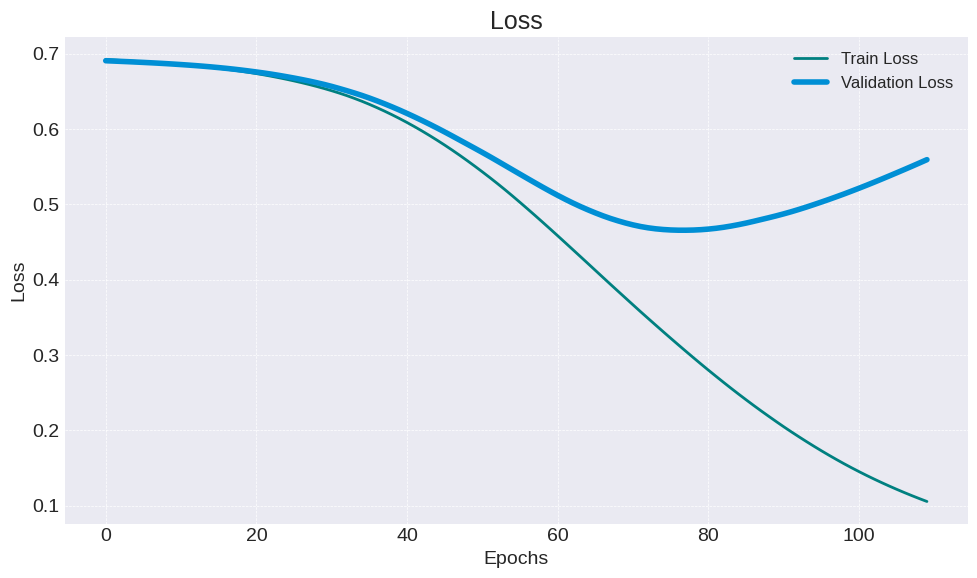

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Loss', fontsize=18)
plt.plot(history.history['loss'], label='Train Loss', color='teal', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

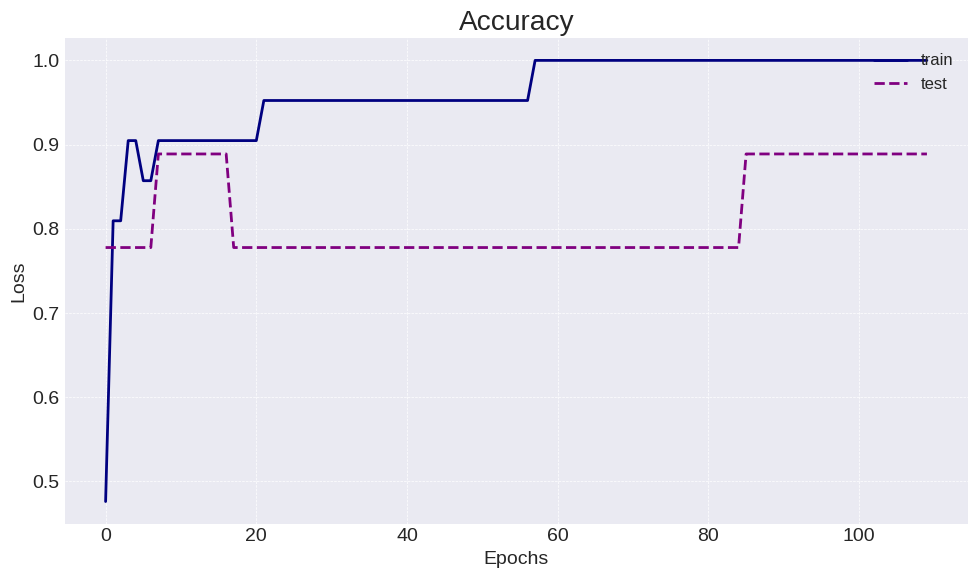

Train: 1.0 Test: 0.8888888955116272


In [ ]:
plt.figure(figsize=(10,6))
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train', color='navy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='test', color='purple', linewidth=2, linestyle='--')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
print('Train:',train_acc,'Test:',test_acc)

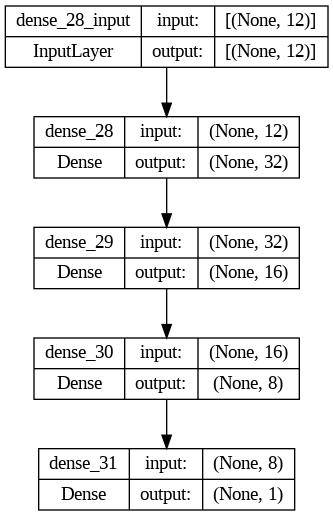

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
print('Train%:', train_acc, 'Test%:',test_acc)

Train%: 1.0 Test%: 0.8888888955116272


In [ ]:
scaler = StandardScaler()
X2 = best_predictors_combined
X3 = scaler.fit_transform(X2)
predictors_c = best_predictors_combined[['FG%','3P','3P%','2P%','PTS']]
X4 = scaler.fit_transform(predictors_c)

y1 = win_percentage[['Total Wins']]
y2 = win_df[['Class(Playoffs)']]

X_train, X_test, Y_train, Y_test = train_test_split(X4, y2, test_size=0.3, random_state=314)

model = Sequential()

model.add(Dense(32, input_dim=X4.shape[1], kernel_initializer='normal', activation='relu'))

# add a second layer
model.add(Dense(16, kernel_initializer='normal', activation='relu'))

# add a third layer
model.add(Dense(8, kernel_initializer='normal', activation='relu'))

# this is the last layer which is the output
model.add(Dense(1, activation='sigmoid'))

# compile the model - see below
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=120, batch_size=50)

model.evaluate(X_train, Y_train)

_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print(model.evaluate(X_test, Y_test))

Epoch 1/120
1/1 [==============================] - 6s 6s/step - loss: 0.6933 - accuracy: 0.3810 - val_loss: 0.6930 - val_accuracy: 0.4444
Epoch 2/120
1/1 [==============================] - 0s 76ms/step - loss: 0.6928 - accuracy: 0.5714 - val_loss: 0.6929 - val_accuracy: 0.4444
Epoch 3/120
1/1 [==============================] - 0s 72ms/step - loss: 0.6924 - accuracy: 0.5714 - val_loss: 0.6927 - val_accuracy: 0.4444
Epoch 4/120
1/1 [==============================] - 0s 114ms/step - loss: 0.6920 - accuracy: 0.5714 - val_loss: 0.6925 - val_accuracy: 0.4444
Epoch 5/120
1/1 [==============================] - 0s 119ms/step - loss: 0.6916 - accuracy: 0.5714 - val_loss: 0.6923 - val_accuracy: 0.4444
Epoch 6/120
1/1 [==============================] - 0s 79ms/step - loss: 0.6912 - accuracy: 0.5714 - val_loss: 0.6921 - val_accuracy: 0.4444
Epoch 7/120
1/1 [==============================] - 0s 62ms/step - loss: 0.6908 - accuracy: 0.5714 - val_loss: 0.6919 - val_accuracy: 0.4444
Epoch 8/120
1/1 [===

In [ ]:
print(model.evaluate(X_test, Y_test))

1/1 [==============================] - 0s 45ms/step - loss: 0.3292 - accuracy: 0.8889
[0.3292140066623688, 0.8888888955116272]


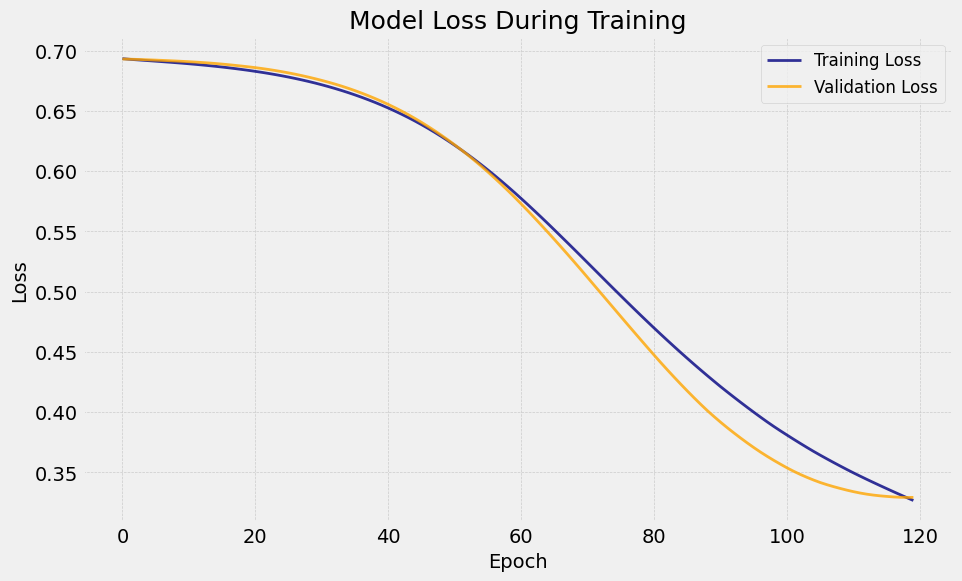

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Model Loss During Training', fontsize=18)

plt.plot(history.history['loss'], label='Training Loss', color='navy', linewidth=2, alpha=0.8)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2, alpha=0.8)

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)



# Classification

# Hierarchical Analysis

In [ ]:
import scipy
scipy.spatial.distance.pdist

<function scipy.spatial.distance.pdist(X, metric='euclidean', *, out=None, **kwargs)>

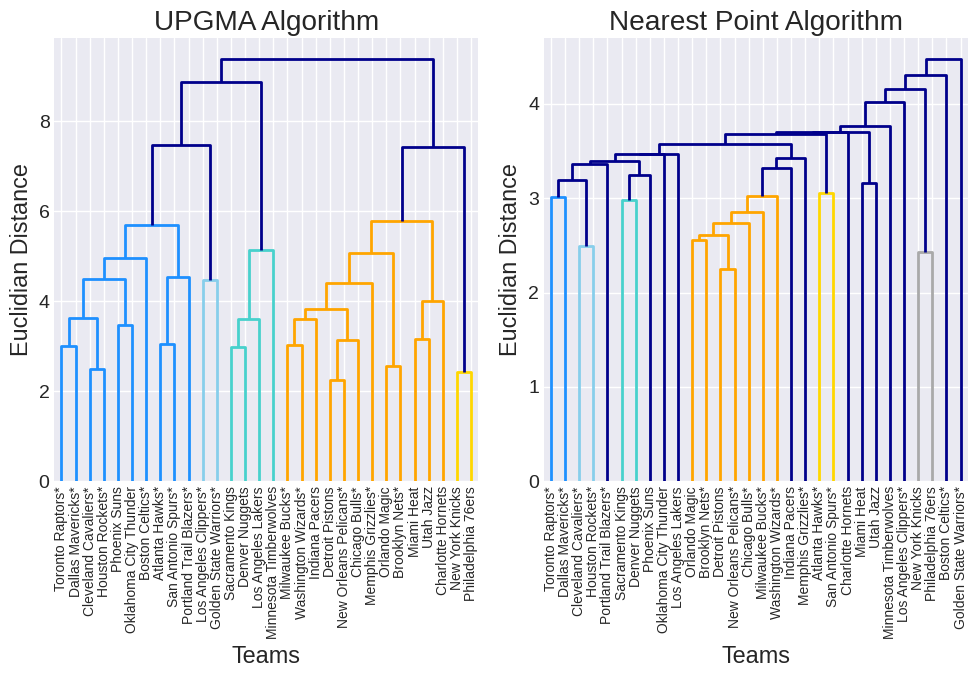

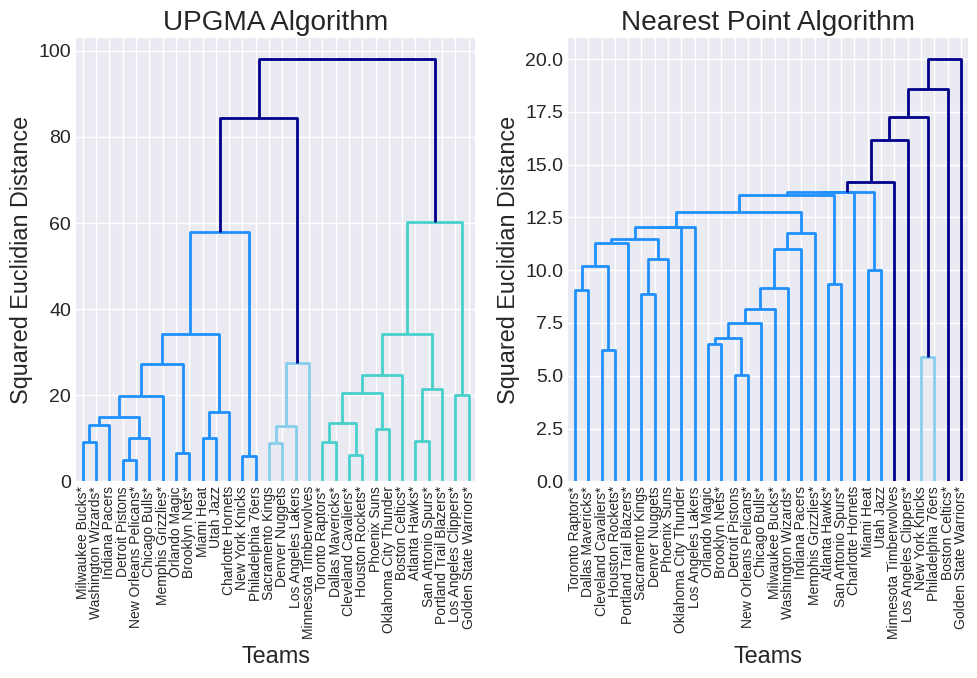

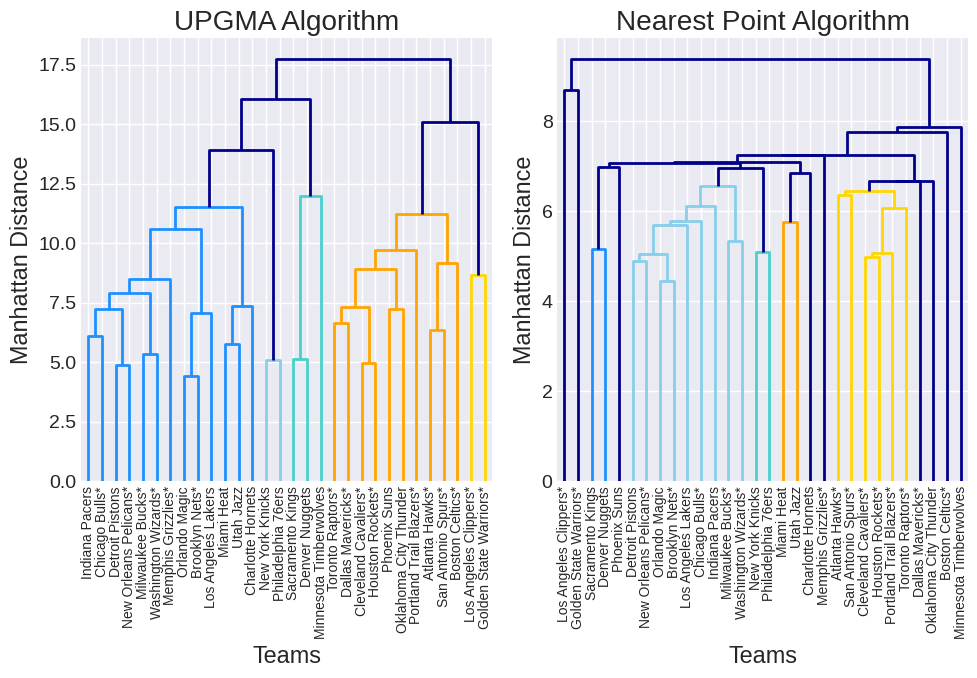

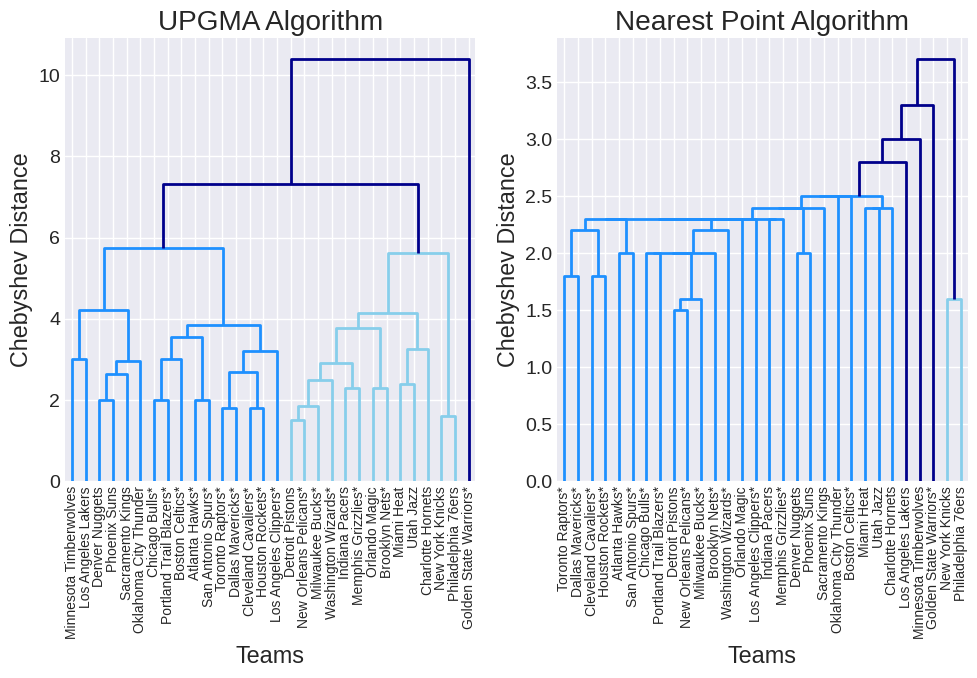

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette
clust1 = linkage(best_predictors_combined, 'average', 'euclidean')
clust2 = linkage(best_predictors_combined, 'average', 'sqeuclidean')
clust3 = linkage(best_predictors_combined, 'average', 'cityblock')
clust4 = linkage(best_predictors_combined, 'average', 'chebyshev')
clust5 = linkage(best_predictors_combined, 'single', 'euclidean')
clust6 = linkage(best_predictors_combined, 'single', 'sqeuclidean')
clust7 = linkage(best_predictors_combined, 'single', 'cityblock')
clust8 = linkage(best_predictors_combined, 'single', 'chebyshev')
lbls = np.array(win_percentage['Team'])
colors = ['dodgerblue','skyblue','mediumturquoise','orange','gold','darkgrey']
set_link_color_palette(colors)
with plt.rc_context({'lines.linewidth':2}):
    #euclidean
    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    dendrogram(clust1,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("UPGMA Algorithm")
    plt.xlabel("Teams")
    plt.ylabel("Euclidian Distance")
    plt.subplot(1, 2, 2)
    dendrogram(clust5,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("Nearest Point Algorithm")
    plt.xlabel("Teams")
    plt.ylabel("Euclidian Distance")
    plt.tight_layout()
    plt.show()

    #euclidean**2
    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    dendrogram(clust2,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("UPGMA Algorithm")
    plt.xlabel("Teams")
    plt.ylabel("Squared Euclidian Distance")
    plt.subplot(1, 2, 2)
    dendrogram(clust6,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("Nearest Point Algorithm")
    plt.xlabel("Teams")
    plt.ylabel("Squared Euclidian Distance")
    plt.tight_layout()
    plt.show()

    #manhatten
    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    dendrogram(clust3,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("UPGMA Algorithm")
    plt.xlabel("Teams")
    plt.ylabel("Manhattan Distance")
    plt.subplot(1, 2, 2)
    dendrogram(clust7,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("Nearest Point Algorithm")
    plt.xlabel("Teams")
    plt.ylabel("Manhattan Distance")
    plt.tight_layout()
    plt.show()
    #chebyshev
    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    dendrogram(clust4,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("UPGMA Algorithm")
    plt.xlabel("Teams")
    plt.ylabel("Chebyshev Distance")
    plt.subplot(1, 2, 2)
    dendrogram(clust8,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("Nearest Point Algorithm")
    plt.xlabel("Teams")
    plt.ylabel("Chebyshev Distance")
    plt.tight_layout()
    plt.show()

set_link_color_palette(None)

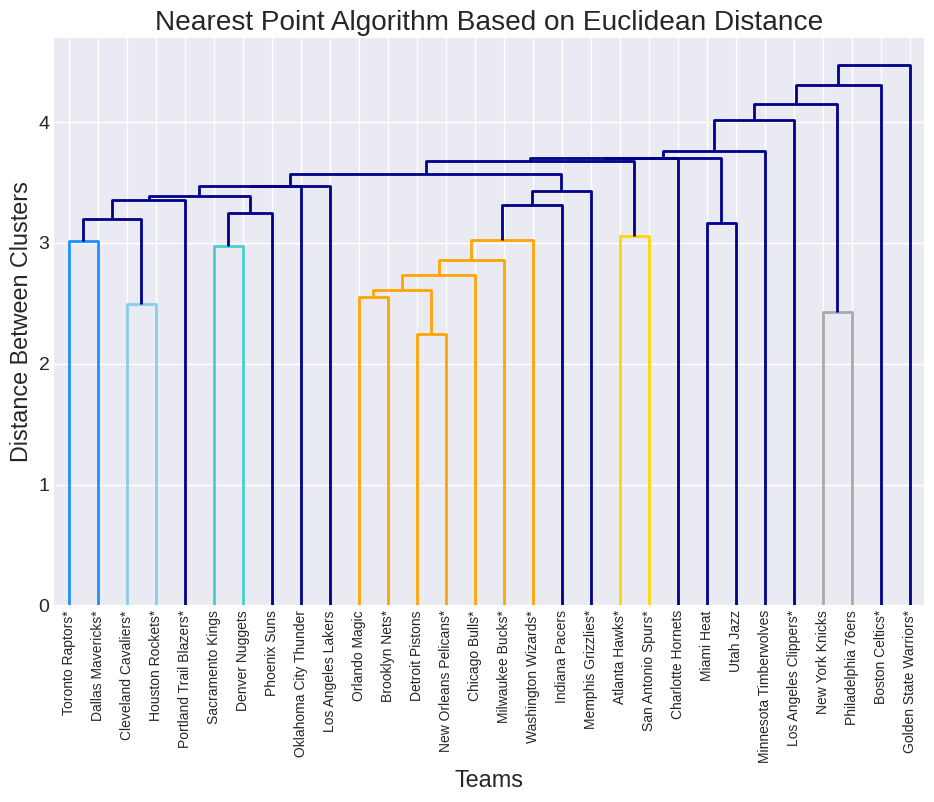

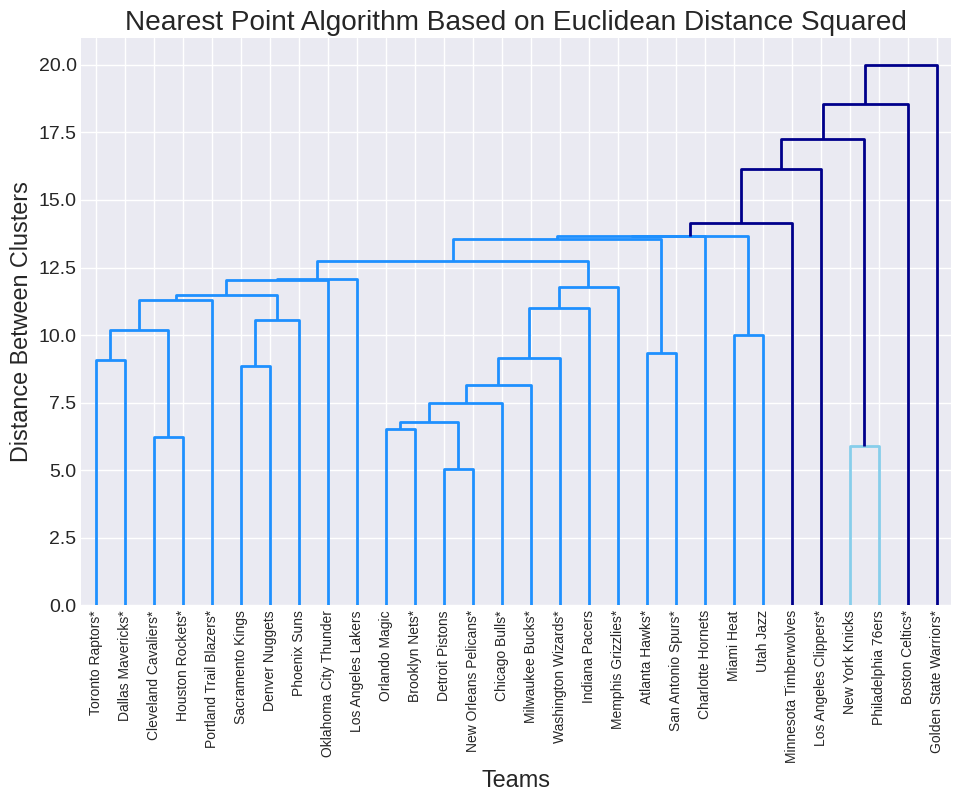

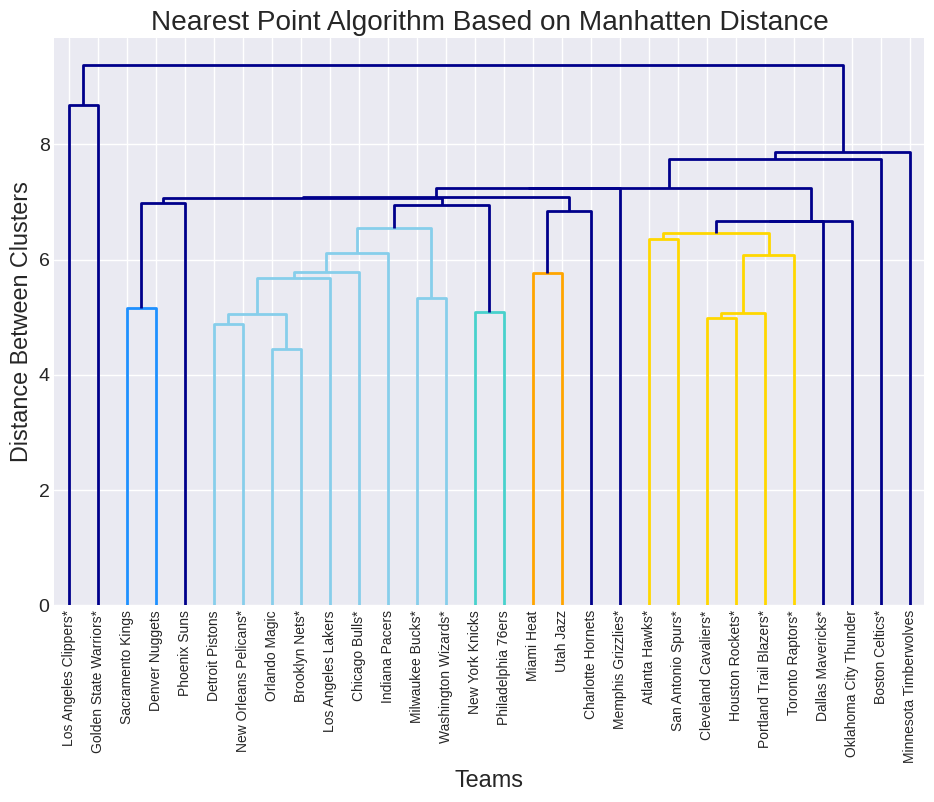

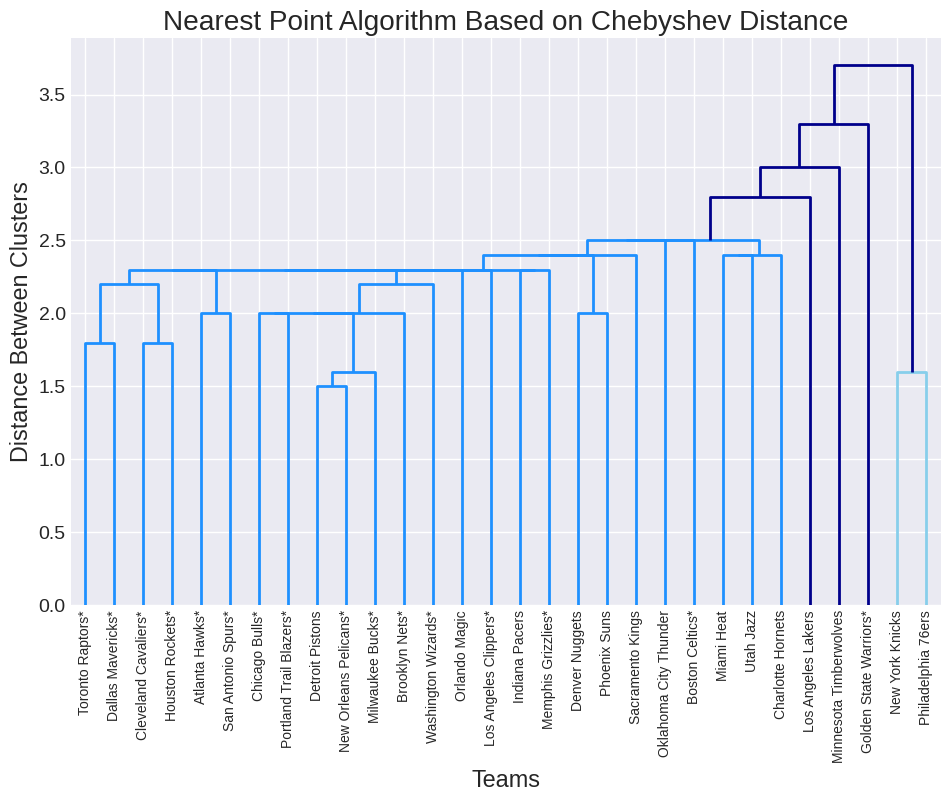

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette
clust1 = linkage(best_predictors_combined, 'single', 'euclidean')
clust2 = linkage(best_predictors_combined, 'single', 'sqeuclidean')
clust3 = linkage(best_predictors_combined, 'single', 'cityblock')
clust4 = linkage(best_predictors_combined, 'single', 'chebyshev')
lbls = np.array(win_percentage['Team'])
colors = ['dodgerblue','skyblue','mediumturquoise','orange','gold','darkgrey']
set_link_color_palette(colors)
with plt.rc_context({'lines.linewidth':2}):
    #single
    plt.figure(figsize=(10, 7))
    dendrogram(clust1,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("Nearest Point Algorithm Based on Euclidean Distance")
    plt.xlabel("Teams")
    plt.ylabel("Distance Between Clusters")
    plt.show()
    #complete
    plt.figure(figsize=(10, 7))
    dendrogram(clust2,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("Nearest Point Algorithm Based on Euclidean Distance Squared")
    plt.xlabel("Teams")
    plt.ylabel("Distance Between Clusters")
    plt.show()
    #average
    plt.figure(figsize=(10, 7))
    dendrogram(clust3,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("Nearest Point Algorithm Based on Manhatten Distance")
    plt.xlabel("Teams")
    plt.ylabel("Distance Between Clusters")
    plt.show()
    #centroid
    plt.figure(figsize=(10, 7))
    dendrogram(clust4,
               orientation='top',
               labels=lbls,
               distance_sort='descending',
               leaf_rotation='vertical',
               above_threshold_color='darkblue')
    plt.title("Nearest Point Algorithm Based on Chebyshev Distance")
    plt.xlabel("Teams")
    plt.ylabel("Distance Between Clusters")
    plt.show()

set_link_color_palette(None)